In [1]:
import re

def extract_task_number(line):
    # Compile a regex pattern to match the task number in parentheses
    pattern = re.compile(r"\(Task (\d+)\)")
    
    # Search for the pattern in the given line
    match = pattern.search(line)
    
    if match:
        # If a match is found, return the captured group which corresponds to the task number
        return int(match.group(1))
    else:
        # Return None or raise an exception if no match is found
        return None
    
    


In [2]:
def parse_log_file(log_file_path):
    # Dictionary to store the accuracy values for each task
    task_accuracies = {}
    current_task = 0  # Start with task 0

    # Open the log file and read line by line
    with open(log_file_path, 'r') as file:
        for line in file:
            line = line.strip()

            # Check for the start of a new task's training phase
            if line == '-- >> Start of training phase << --':
                if current_task not in task_accuracies:
                    task_accuracies[current_task] = []
                else:
                    current_task += 1  # Increment task number at the start of a new training phase
                    task_accuracies[current_task] = []  # Initialize the list for the new task

            # Extract accuracy values
            if 'Top1_Acc_Exp/eval_phase/test_stream/' in line:
                # Parse the accuracy value from the line
                accuracy = float(line.split('=')[1].strip())
                # Append the accuracy value to the current task's list
                task_accuracies[current_task].append(accuracy)

    return task_accuracies


In [3]:
def parse_log_file2(log_file_path):
    # Dictionary to store the individual accuracy values for each task and the average accuracy
    task_accuracies = {"individual": {}, "average": {}}
    current_task = 0  # Start with task 0

    # Open the log file and read line by line
    with open(log_file_path, 'r') as file:
        for line in file:
            line = line.strip()

            # Check for the start of a new task's training phase
            if line == '-- >> Start of training phase << --':
                current_task += 1  # Increment task number at the start of a new training phase
                task_accuracies["individual"][current_task-1] = []  # Initialize the list for the new task

            # Extract accuracy values during task training
            if 'Top1_Acc_Exp/eval_phase/test_stream/' in line:
                # Parse the accuracy value from the line
                accuracy = float(line.split('=')[1].strip())
                # Append the accuracy value to the current task's list
                task_accuracies["individual"][current_task-1].append(accuracy)

            # Extract the last average accuracy value after each task
            if line.startswith('Top1_Acc_Stream/eval_phase/test_stream/'):
                # Parse the accuracy value from the line
                accuracy = float(line.split('=')[1].strip())
                # Store this accuracy in the 'average' key for the corresponding task
                task_accuracies["average"][current_task] = accuracy

    return task_accuracies


In [32]:
# Path to the log file
log_file_path1 = 'logs/log_real_sythesis_mixup.txt'

# Parse the log file and get the accuracies dictionary
accuracies1 = parse_log_file2(log_file_path1)

# log_file_path2 = 'logs/method2_10buffer.txt'

# # Parse the log file and get the accuracies dictionary
# accuracies2 = parse_log_file2(log_file_path2)
# print(accuracies2)

In [4]:
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt

def plot_task_accuracies_task(task_accuracies, saved_name):
    task_accuracies = task_accuracies['individual']
    # Set up a figure with a grid of subplots
    fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(20, 16))  # 4x5 grid of plots
    fig.subplots_adjust(hspace=0.5, wspace=0.3)
    axes = axes.flatten()  # Flatten to 1D array for easier iteration

    # Iterate over each task and its corresponding accuracies
    for i in range(20):  # Assuming there are 20 tasks, indexed 0 to 19
        ax = axes[i]
        task_data = []
        
        # Initialize the list with None for tasks 0 to i-1
        task_data = [None] * 20  # Pre-fill with None for clarity

        # Gather accuracies for the current task from all tasks' evaluations
        for task_trained in range(i, 20):  # Start collecting data from the current task onward
            if task_trained in task_accuracies and len(task_accuracies[task_trained]) > i:
                task_data[task_trained] = task_accuracies[task_trained][i]
        
        # Filter data to remove leading None values if all are None before first non-None value
        if any(v is not None for v in task_data):
            # Plot the accuracies
            x_values = list(range(20))
            ax.plot(x_values, task_data, marker='o', linestyle='-', label=f'Task {i}')
            ax.set_title(f'Task {i} Accuracies')
            ax.set_xlabel('Tasks Trained')
            ax.set_ylabel('Accuracy')
            ax.set_ylim([0, 1])
            ax.set_xlim([0, 19])
            ax.grid(True)
#             ax.legend()
    plt.savefig(saved_name)
    plt.show()

import matplotlib.pyplot as plt

import matplotlib.pyplot as plt

def plot_dual_task_accuracies1(task_accuracies1, task_accuracies2, saved_name):
    task_accuracies1 = task_accuracies1['individual']
    task_accuracies2 = task_accuracies2['individual']
    
    
    # Set up a figure with a grid of subplots
    fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(20, 16))  # 4x5 grid of plots
    fig.subplots_adjust(hspace=0.5, wspace=0.3)
    axes = axes.flatten()  # Flatten to 1D array for easier iteration

    # Iterate over each task and its corresponding accuracies
    for i in range(20):  # Assuming there are 20 tasks, indexed 0 to 19
        ax = axes[i]
        task_data1 = []
        task_data2 = []
        
        # Initialize the list with None for tasks 0 to i-1
        task_data1 = [None] * 20  # Pre-fill with None for clarity
        task_data2 = [None] * 20

        # Gather accuracies for the current task from all tasks' evaluations
        for task_trained in range(i, 20):  # Start collecting data from the current task onward
            if (task_trained in task_accuracies1 and len(task_accuracies1[task_trained]) > i) and \
            (task_trained in task_accuracies2 and len(task_accuracies2[task_trained]) > i):
                task_data1[task_trained] = task_accuracies1[task_trained][i]
                task_data2[task_trained] = task_accuracies2[task_trained][i]
                
        
        # Filter data to remove leading None values if all are None before first non-None value
        if any(v is not None for v in task_data1):
            # Plot the accuracies
            x_values = list(range(20))
            ax.plot(x_values, task_data1, marker='o', linestyle='-', color = 'red', label=f'Real+Synthesis')
            ax.plot(x_values, task_data2, marker='o', linestyle='-', color = 'blue', label=f'Real')
            
            ax.set_title(f'Task {i} Accuracies')
            ax.set_xlabel('Tasks Trained')
            ax.set_ylabel('Accuracy')
            ax.set_ylim([0, 1])
            ax.set_xlim([0, 19])
            ax.grid(True)
            ax.legend()
    plt.savefig(saved_name)
    plt.show()

    import matplotlib.pyplot as plt

def plot_dual_task_accuracies(task_accuracies1, task_accuracies2, saved_name):
    task_accuracies1 = task_accuracies1['individual']
    task_accuracies2 = task_accuracies2['individual']
    
    # Set up a figure with a grid of subplots
    fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(20, 16))  # 4x5 grid of plots
    fig.subplots_adjust(hspace=0.5, wspace=0.3, bottom=0.1)  # Adjust the bottom to make space for the legend
    axes = axes.flatten()  # Flatten to 1D array for easier iteration

    # Iterate over each task and its corresponding accuracies
    for i in range(20):  # Assuming there are 20 tasks, indexed 0 to 19
        ax = axes[i]
        task_data1 = [None] * 20
        task_data2 = [None] * 20

        # Gather accuracies for the current task from all tasks' evaluations
        for task_trained in range(i, 20):
            if task_trained in task_accuracies1 and len(task_accuracies1[task_trained]) > i:
                task_data1[task_trained] = task_accuracies1[task_trained][i]
            if task_trained in task_accuracies2 and len(task_accuracies2[task_trained]) > i:
                task_data2[task_trained] = task_accuracies2[task_trained][i]
                
        # Plot the accuracies
        x_values = list(range(20))
        ax.plot(x_values, task_data1, marker='o', linestyle='-', color='red', label='with budget')
        ax.plot(x_values, task_data2, marker='o', linestyle='-', color='blue', label='without budget')
        
        ax.set_title(f'Task {i} Accuracies')
        ax.set_xlabel('Tasks Trained')
        ax.set_ylabel('Accuracy')
        ax.set_ylim([0, 1])
        ax.set_xlim([0, 19])
        ax.grid(True)

    # Add an overall figure title and a legend below the plots
#     fig.suptitle('Comparison of Task Accuracies', fontsize=16)
    handles, labels = ax.get_legend_handles_labels()
    fig.legend(handles, labels, loc='lower center', ncol=2, fontsize='large')

    plt.savefig(saved_name)
    plt.show()


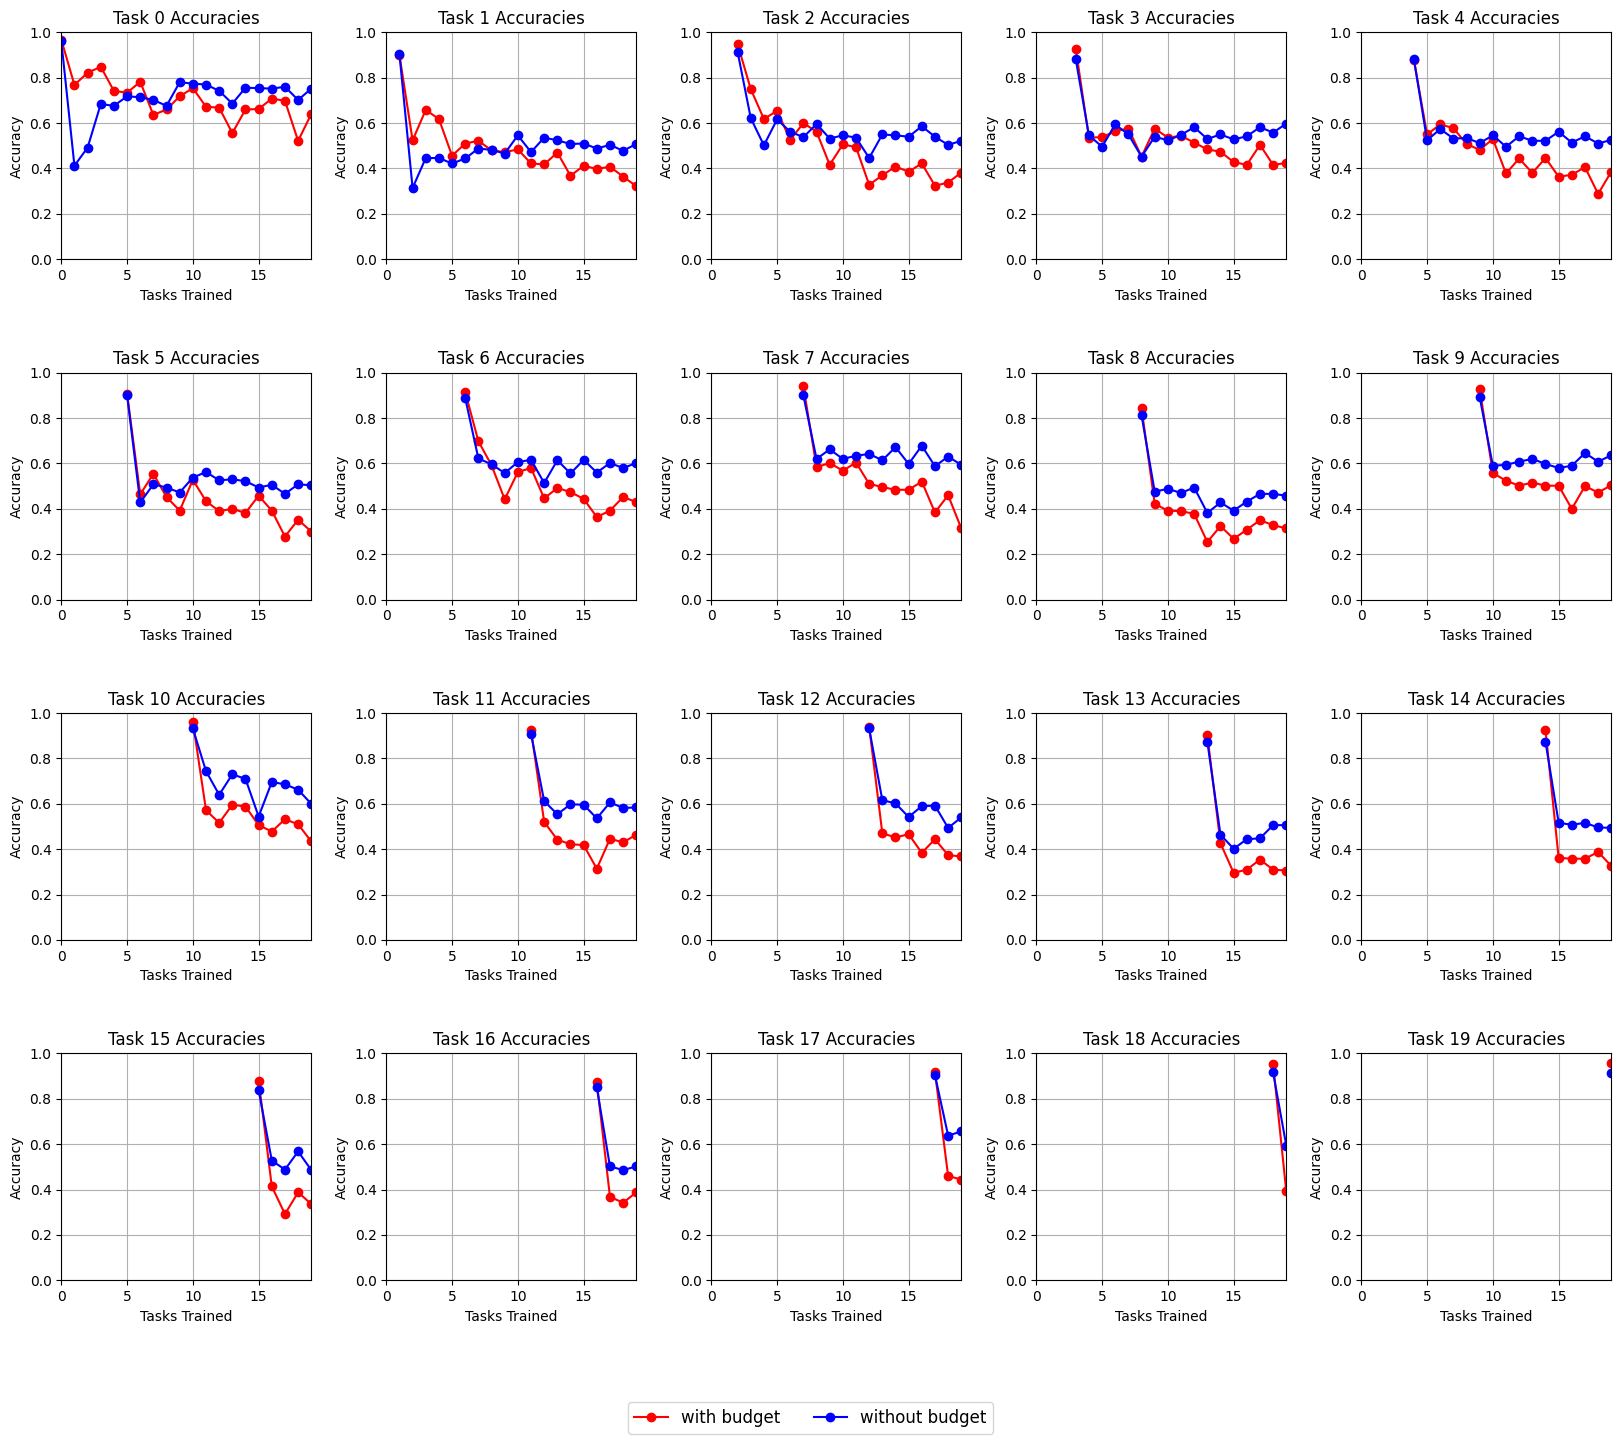

In [23]:
plot_dual_task_accuracies(accuracies1, accuracies2, 'figures/method2_wo_budget.png')

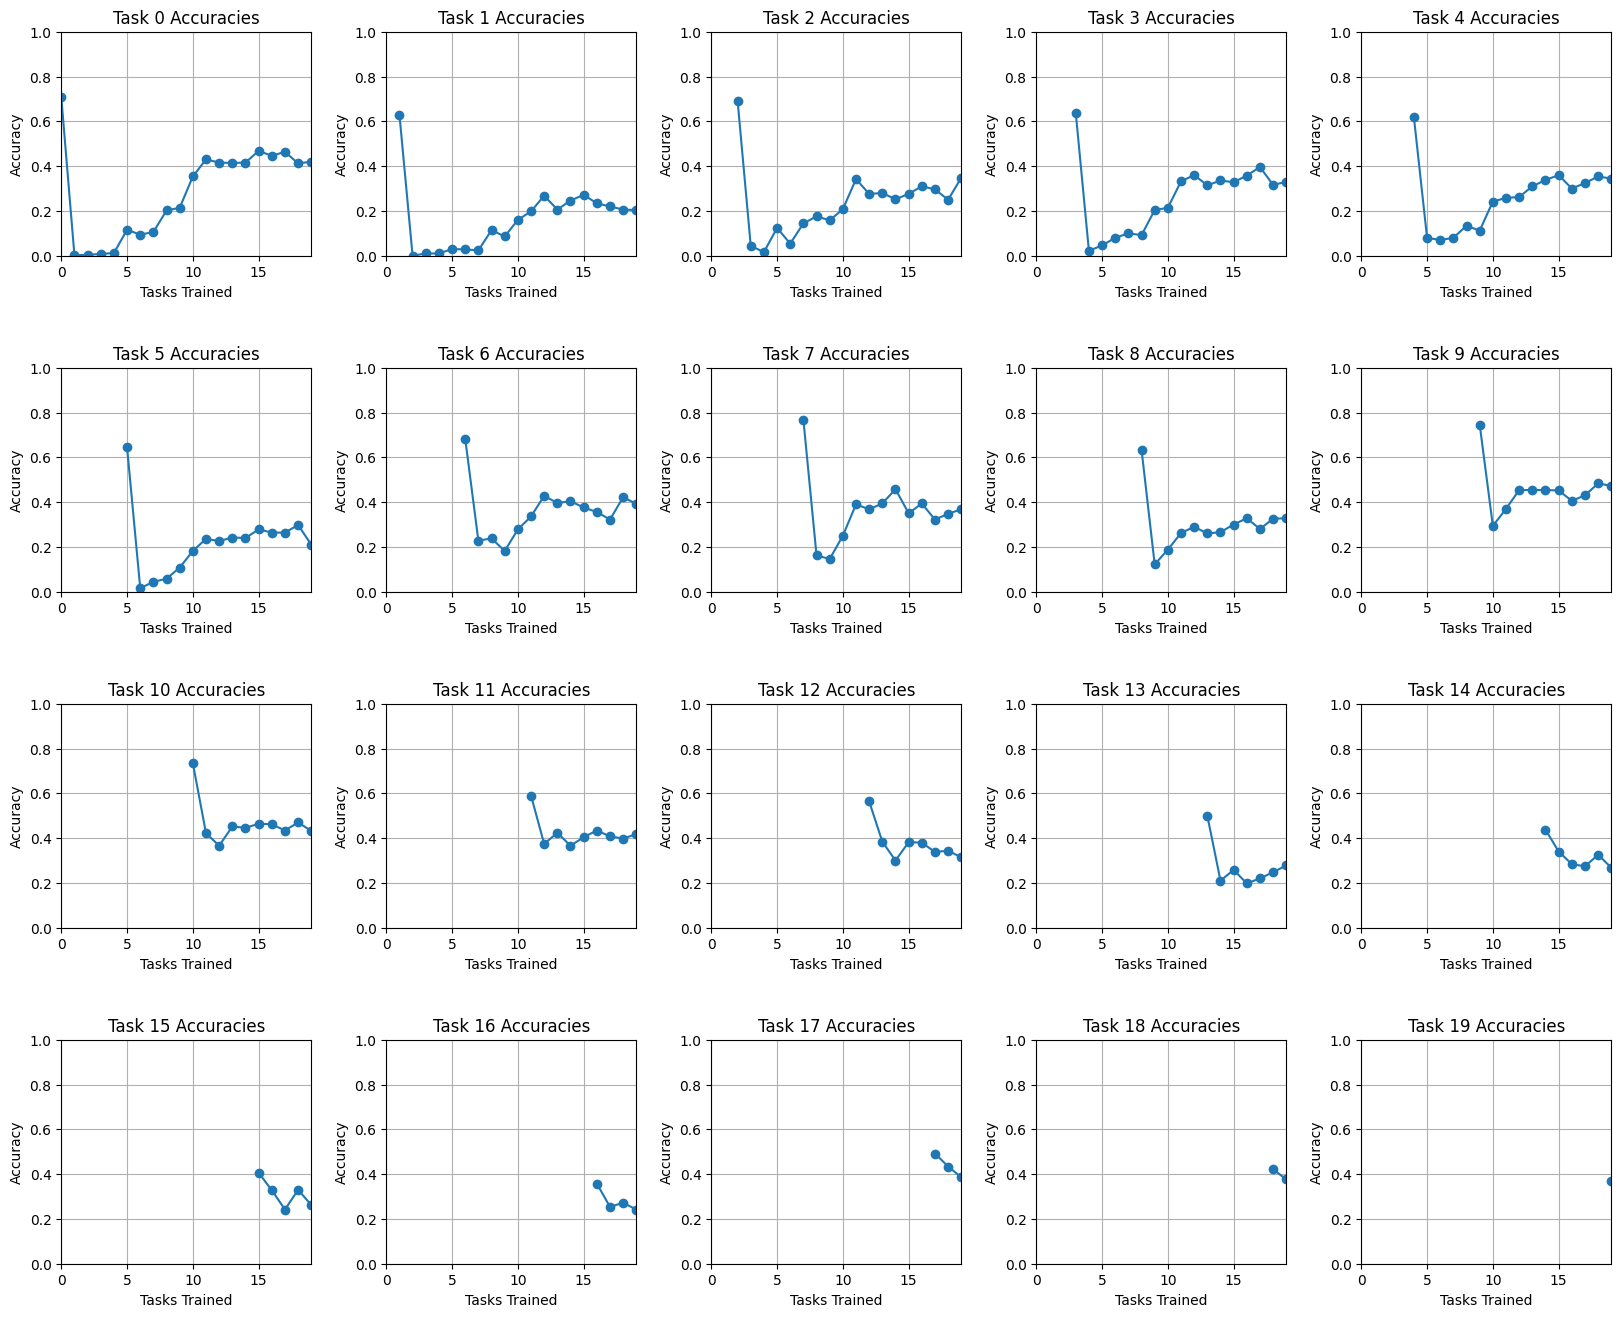

In [36]:
plot_task_accuracies_task(accuracies1, 'figures/task_mixup.png')

In [8]:
def plot_task_accuracies_average(task_accuracies, saved_name):
    acc = task_accuracies['average']
    acc = list(acc.values())
    
    plt.figure(figsize=(5, 4))
    plt.plot(acc, marker='o', linestyle='-')
    plt.title('Average accuracy')
    plt.xlabel('Task')
    plt.ylabel('Accuracy')
    plt.xlim(left=-0.5) 
    plt.ylim(0, 1)
#     plt.legend()
    plt.grid(True)
    plt.xticks(range(0, 20))
    
    plt.savefig(saved_name)
    plt.show()

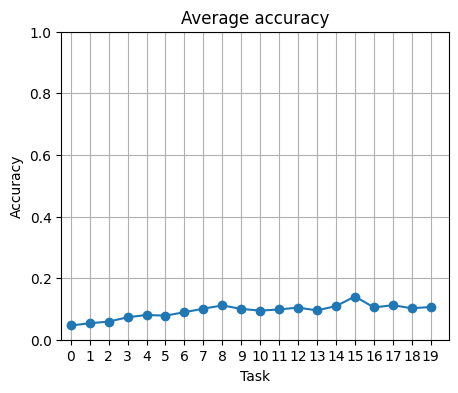

In [9]:
plot_task_accuracies_average(accuracies2, 're_sd_grey_avg.png')

In [10]:


def count_lines(file_path):
    count = 0
    try:
        with open(file_path, 'r') as file:
            for line in file:
                count += 1
    except FileNotFoundError:
        print("File not found.")
        return None
    except Exception as e:
        print(f"An error occurred: {e}")
        return None
    return count

#


In [11]:
log_file_path_method2 = 'log.txt'
count_lines(log_file_path_method2)

37469

In [12]:
count_lines('log_method3_20buffer_0414.txt')

4740

In [13]:
# Path to the log file
log_file_path_method2 = 'log.txt'

def tail_to_new_file(input_file_path, output_file_path, n):
    with open(input_file_path, 'rb') as file:
        file.seek(0, 2)  # Move the cursor to the end of the file
        file_size = file.tell()
        buffer = bytearray()
        lines_count = 0
        
        # Starting from the end of the file, seek backwards
        for byte in range(file_size - 1, -1, -1):
            file.seek(byte)
            char = file.read(1)
            if char == b'\n':
                lines_count += 1
                if lines_count == n + 1:
                    break
            buffer.extend(char)
        
        # Reverse buffer to read lines from end to start
        buffer.reverse()
        lines = buffer.decode().splitlines()

    # Save the lines to the new file
    with open(output_file_path, 'w') as file:
        for line in lines:
            file.write(line + '\n')


In [14]:

# Example usage
input_file_path = 'log.txt'
output_file_path = 'log_method2.txt'
n = 4740  # Number of lines to retrieve and save
tail_to_new_file(input_file_path, output_file_path, n)
print(f"The last {n} lines have been saved to '{output_file_path}'.")


The last 4740 lines have been saved to 'log_method2.txt'.


In [15]:
# Path to the log file
log_file_path = 'log_method2.txt'

# Parse the log file and get the accuracies dictionary
accuracies_m2 = parse_log_file2(log_file_path)

print(accuracies_m2)

{'individual': {0: [0.956, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 1: [0.568, 0.902, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 2: [0.59, 0.378, 0.936, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 3: [0.714, 0.466, 0.638, 0.91, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 4: [0.702, 0.512, 0.522, 0.57, 0.902, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 5: [0.728, 0.446, 0.642, 0.532, 0.546, 0.898, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 6: [0.706, 0.536, 0.536, 0.518, 0.53, 0.524, 0.91, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 7: [0.698, 0.51, 0.582, 0.618, 0.58, 0.552, 0.588, 0.894, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 8: [0.686, 0.53, 0.614, 0.516, 0.562, 0.51, 0.6, 0.668, 0.828, 0.0, 0.0, 0.0, 0

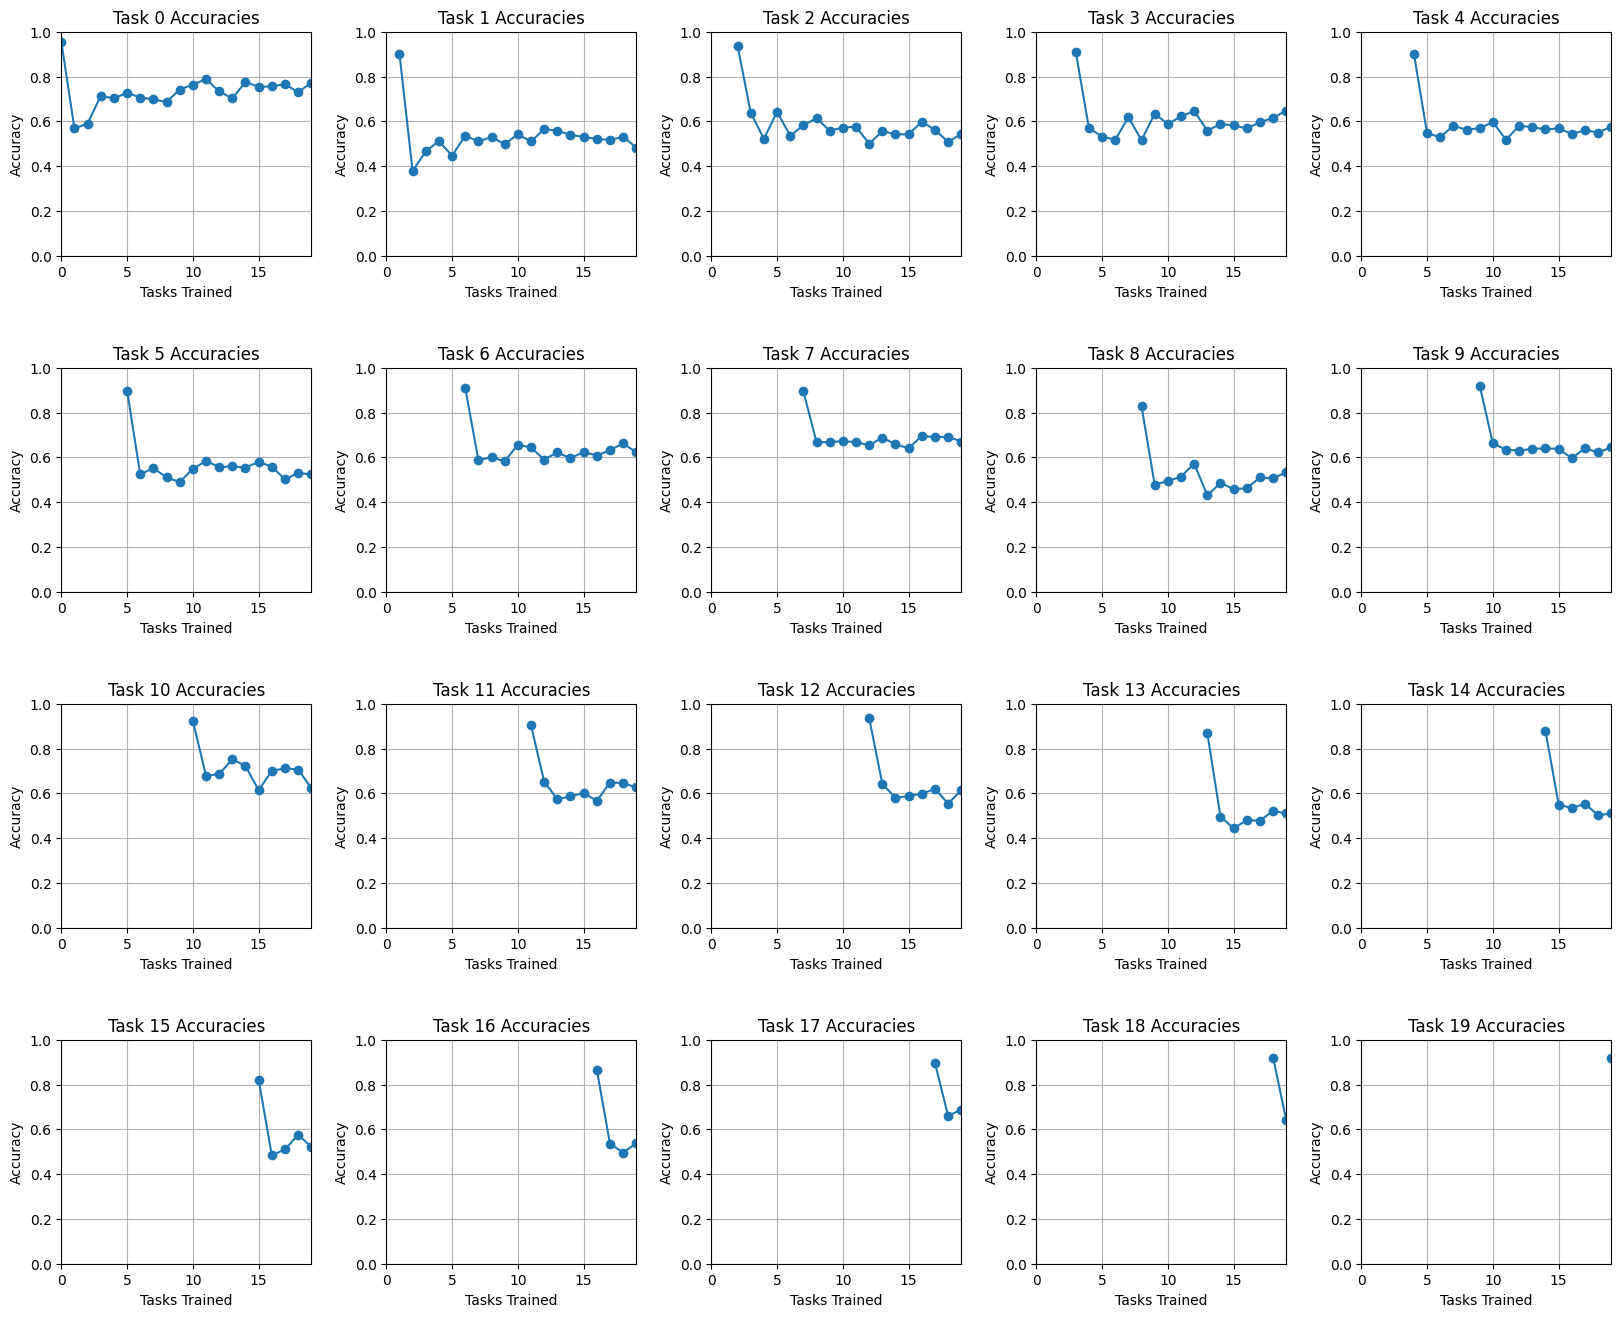

In [16]:
plot_task_accuracies_task(accuracies_m2, 're_method2.png')

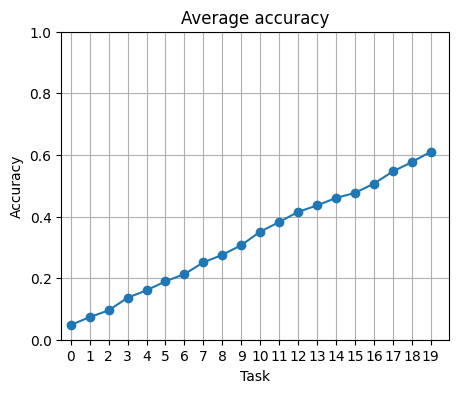

In [17]:
plot_task_accuracies_average(accuracies_m2, 're_method2_avg.png')

In [7]:
log_file_path = 'logs/log_method1_20buffer_0415.txt'

# Parse the log file and get the accuracies dictionary
accuracies2 = parse_log_file2(log_file_path)

print(accuracies2)

{'individual': {0: [0.966, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 1: [0.736, 0.9, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 2: [0.676, 0.452, 0.924, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 3: [0.808, 0.59, 0.74, 0.92, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 4: [0.766, 0.608, 0.682, 0.678, 0.868, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 5: [0.692, 0.46, 0.634, 0.638, 0.658, 0.87, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 6: [0.722, 0.494, 0.556, 0.624, 0.626, 0.658, 0.924, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 7: [0.702, 0.534, 0.57, 0.638, 0.658, 0.658, 0.802, 0.912, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 8: [0.662, 0.496, 0.57, 0.488, 0.58, 0.562, 0.702, 0.76, 0.86, 0.0, 0.0, 0.0, 0.

In [1]:
# plot_task_accuracies_task(accuracies2, 're_method1.png')

In [4]:
d = {1: [0, 36, 5, 20, 54], 2: [45, 13, 19, 83, 22]}

In [5]:
import matplotlib.pyplot as plt
import re

# def parse_log_file_class(log_file_path, task_class_dict):
#     # Dictionary to store class accuracies where key is the class and value is a list of accuracies
#     class_accuracies = {i: [None] * 20 for i in range(100)}  # Assuming 100 classes

#     # Variable to track the current task being evaluated
#     current_task = -1

#     # Regular expression to identify and parse accuracy lines
#     acc_pattern = re.compile(r'Top1_ClassAcc_Exp/eval_phase/test_stream/Task000/(\d+) = (\d+)')

#     with open(log_file_path, 'r') as file:
#         for line in file:
#             line = line.strip()

#             # Check for the end of an evaluation phase to update the current task
#             if '-- >> End of eval phase << --' in line:
#                 current_task += 1
#                 print(current_task)

#             # Match lines containing class accuracies
#             match = acc_pattern.match(line)
#             if match:
#                 cls, acc = match.groups()
#                 cls, acc = int(cls), float(acc)
#                 print(cls, acc)

#                 # Store the accuracy from the task where the class first appears and onwards
#                 # Map the experience number `exp` to the correct task number
#                 if cls in task_class_dict.get(exp, []):
#                     if class_accuracies[cls][exp] is None:
#                         class_accuracies[cls][exp] = acc

#     return class_accuracies

def parse_log_file_class(file_path):
    # Initialize a dictionary to hold the accuracy list for each class
    class_accuracies = {i: [] for i in range(100)}  # Assuming 100 classes

    # Regular expression to match the accuracy entries
    pattern = re.compile(r"Top1_ClassAcc_Stream/eval_phase/test_stream/Task000/(\d+) = (\d+\.\d+)")

    with open(file_path, 'r') as file:
        # Read the file line by line
        for line in file:
            line = line.strip()
            # Check for a match to the pattern
            match = pattern.match(line)
            if match:
                class_id, accuracy = match.groups()
                class_id = int(class_id)
                accuracy = float(accuracy)
                # Append the accuracy to the corresponding class' list
                class_accuracies[class_id].append(accuracy)

    return class_accuracies


import matplotlib.pyplot as plt

def plot_class_accuracies(class_accuracies, task_class_dict, saved_name):
    # Set up a figure with a grid of subplots for the 100 classes
    fig, axes = plt.subplots(nrows=10, ncols=10, figsize=(20, 20))
    fig.subplots_adjust(hspace=0.5, wspace=0.3)
    axes = axes.flatten()

    # Initialize the first appearance for each class
    first_appearance = {cls: None for cls in range(100)}
    for task, classes in task_class_dict.items():
        for cls in classes:
            if first_appearance[cls] is None:
                first_appearance[cls] = task

    # Iterate over each class and plot their accuracies
    for cls in range(100):
        ax = axes[cls]
        if cls in class_accuracies:
            accuracies = class_accuracies[cls]
            task_indices = list(range(first_appearance[cls], first_appearance[cls] + len(accuracies)))
            ax.plot(task_indices, accuracies, marker='o', linestyle='-', color='b', label=f'Class {cls}')
            ax.set_ylim([0, 1])
            ax.set_xlim([0, 20])
            ax.set_title(f'Class {cls}')
            ax.set_xlabel('Task Index')
            ax.set_ylabel('Accuracy')
            ax.grid(True)
        else:
            ax.set_title(f'Class {cls}')
            ax.set_xlabel('Task Index')
            ax.set_ylabel('Accuracy')
            ax.set_ylim([0, 1])
            ax.set_xlim([0, 20])
            ax.grid(True)

    # Save the plot to a file
    plt.tight_layout()  # Adjust subplots to fit into figure area.
    plt.savefig(saved_name)
    plt.show()


In [6]:
import matplotlib.pyplot as plt

def plot_class_accuracies_mixed(class_accuracies, task_class_dict, saved_name, highlight_classes):
    """
    Plots class accuracies with highlighted classes in a different color.

    :param class_accuracies: Dictionary with class keys and list of accuracies as values.
    :param task_class_dict: Dictionary mapping task index to classes appearing in that task.
    :param saved_name: Filename to save the plot.
    :param highlight_classes: List of classes to highlight in a different color.
    """
    # Set up a figure with a grid of subplots for the 100 classes
    fig, axes = plt.subplots(nrows=10, ncols=10, figsize=(20, 20))
    fig.subplots_adjust(hspace=0.5, wspace=0.3)
    axes = axes.flatten()

    # Initialize the first appearance for each class
    first_appearance = {cls: None for cls in range(100)}
    for task, classes in task_class_dict.items():
        for cls in classes:
            if first_appearance[cls] is None:
                first_appearance[cls] = task

    # Define colors
    default_color = 'b'  # Default color for normal classes
    highlight_color = 'r'  # Color for highlighted classes

    # Iterate over each class and plot their accuracies
    for cls in range(100):
        ax = axes[cls]
        if cls in class_accuracies:
            accuracies = class_accuracies[cls]
            task_indices = range(first_appearance[cls], first_appearance[cls] + len(accuracies))
            color = highlight_color if cls in highlight_classes else default_color
            ax.plot(task_indices, accuracies, marker='o', linestyle='-', color=color, label=f'Class {cls}')
            ax.set_ylim([0, 1])
            ax.set_xlim([0, 20])
            ax.set_title(f'Class {cls}')
            ax.set_xlabel('Task Index')
            ax.set_ylabel('Accuracy')
            ax.grid(True)
        else:
            ax.set_title(f'Class {cls}')
            ax.set_xlabel('Task Index')
            ax.set_ylabel('Accuracy')
            ax.set_ylim([0, 1])
            ax.set_xlim([0, 20])
            ax.grid(True)

    # Save the plot to a file
    plt.tight_layout()  # Adjust subplots to fit into figure area.
    plt.savefig(saved_name)
    plt.show()


In [7]:

# Example usage:
task2class = {
    0: [0, 36, 5, 20, 54],
    1: [45, 13, 19, 83, 22],
    2: [33, 73, 16, 26, 62],
    3: [98, 34, 74, 53, 24],
    4: [32, 4, 10, 51, 94],
    5: [38, 40, 41, 81, 50],
    6: [64, 69, 21, 89, 30],
    7: [68, 14, 49, 84, 88],
    8: [65, 6, 46, 80, 57],
    9: [72, 9, 48, 91, 31],
    10: [1, 7, 8, 76, 47],
    11: [75, 18, 86, 61, 63],
    12: [70, 43, 85, 59, 95],
    13: [35, 82, 25, 27, 93],
    14: [66, 67, 37, 44, 56],
    15: [2, 11, 78, 52, 60],
    16: [97, 99, 3, 39, 55],
    17: [71, 23, 90, 28, 29],
    18: [77, 15, 17, 87, 92],
    19: [96, 42, 12, 79, 58]
}


In [8]:
def truncate_class_accuracies(class_accuracies, task_class_dict):
    # Find the first appearance of each class
    first_appearance = {cls: None for cls in range(100)}  # Assuming 100 classes

    for task, classes in task_class_dict.items():
        for cls in classes:
            if first_appearance[cls] is None:
                first_appearance[cls] = task

    # Truncate the accuracy lists based on the first appearance
    truncated_accuracies = {}
    for cls, accuracies in class_accuracies.items():
        start_task = first_appearance[cls]
        if start_task is not None:
            truncated_accuracies[cls] = accuracies[start_task:]
        else:
            truncated_accuracies[cls] = []

    return truncated_accuracies


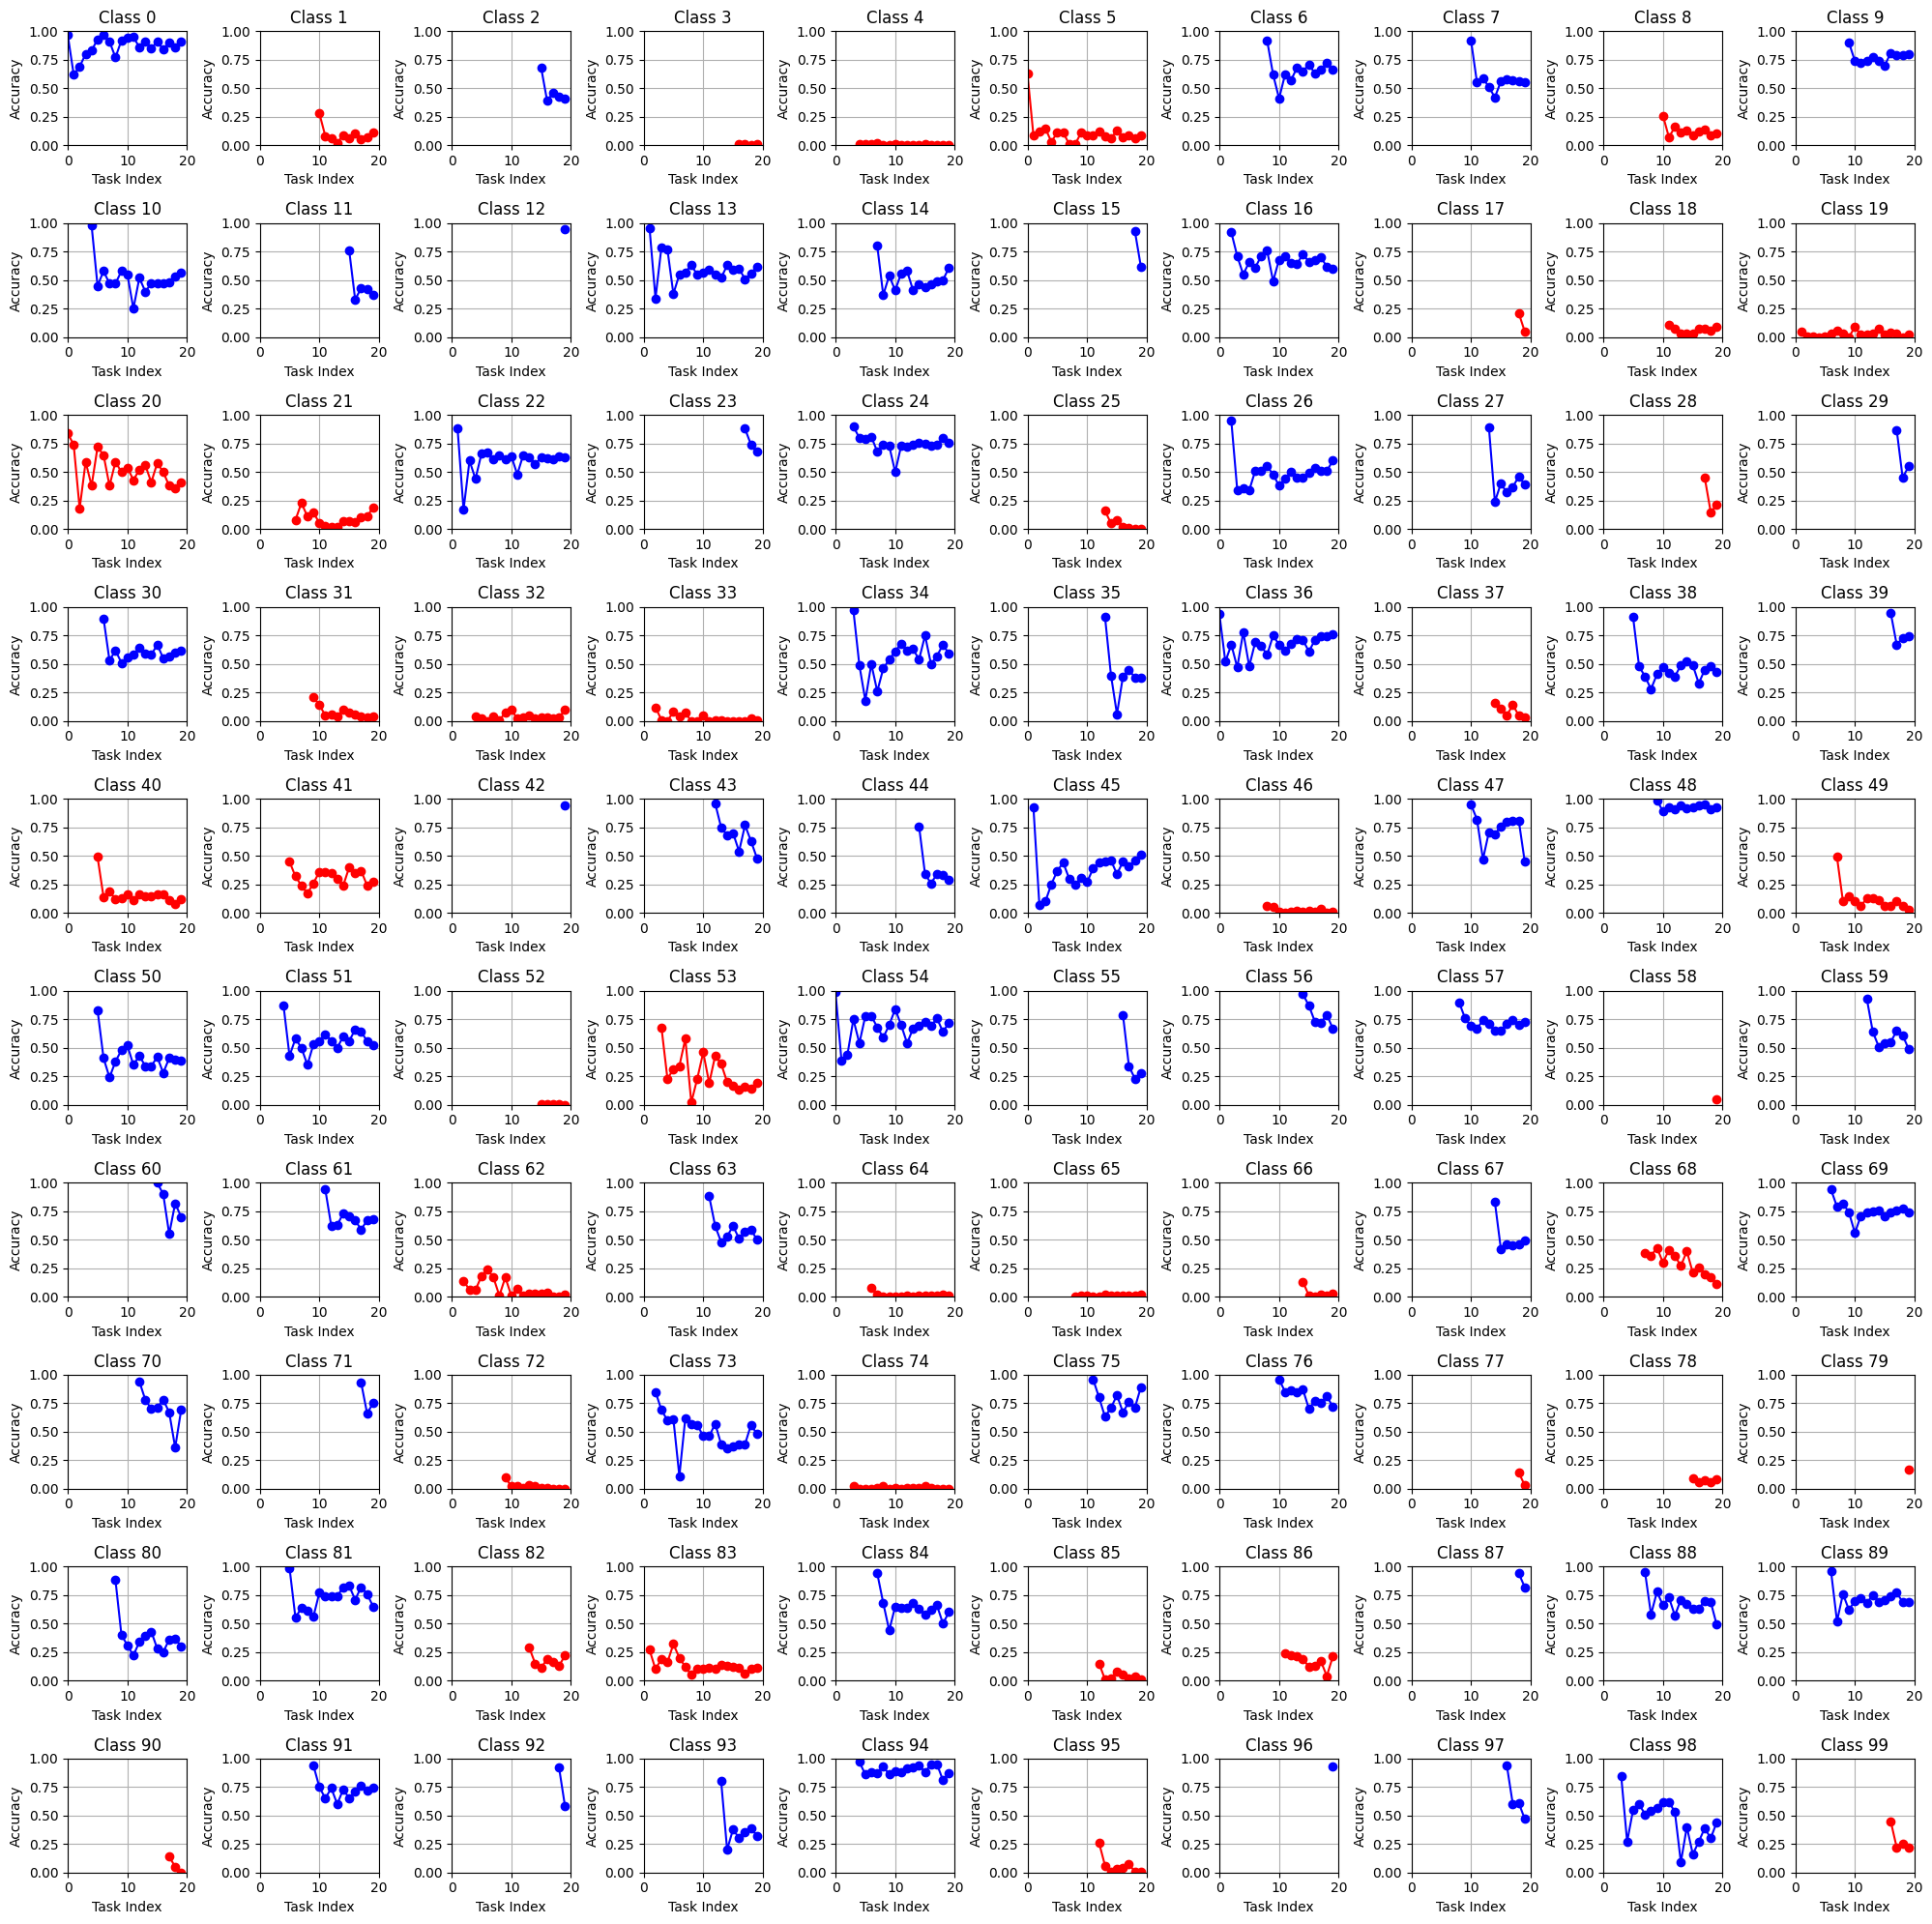

In [10]:
# class_accuracies1 = parse_log_file_class('logs/real_synthesis_fixedbudget_class.txt')
# dict_test1 = class_accuracies1
# outcome1 = truncate_class_accuracies(dict_test1, task2class)
# plot_class_accuracies(outcome1, task2class,'figures/real_synthesis_fixedbudget_class.png')

class_accuracies1 = parse_log_file_class('logs/log_real_sythesis_llavaprompt_class_3real_i2i.txt')
dict_test1 = class_accuracies1
outcome1 = truncate_class_accuracies(dict_test1, task2class)
plot_class_accuracies_mixed(outcome1, task2class,'figures/log_real_sythesis_llavaprompt_class_3real_i2i.png', highlight_classes = syn_classes)


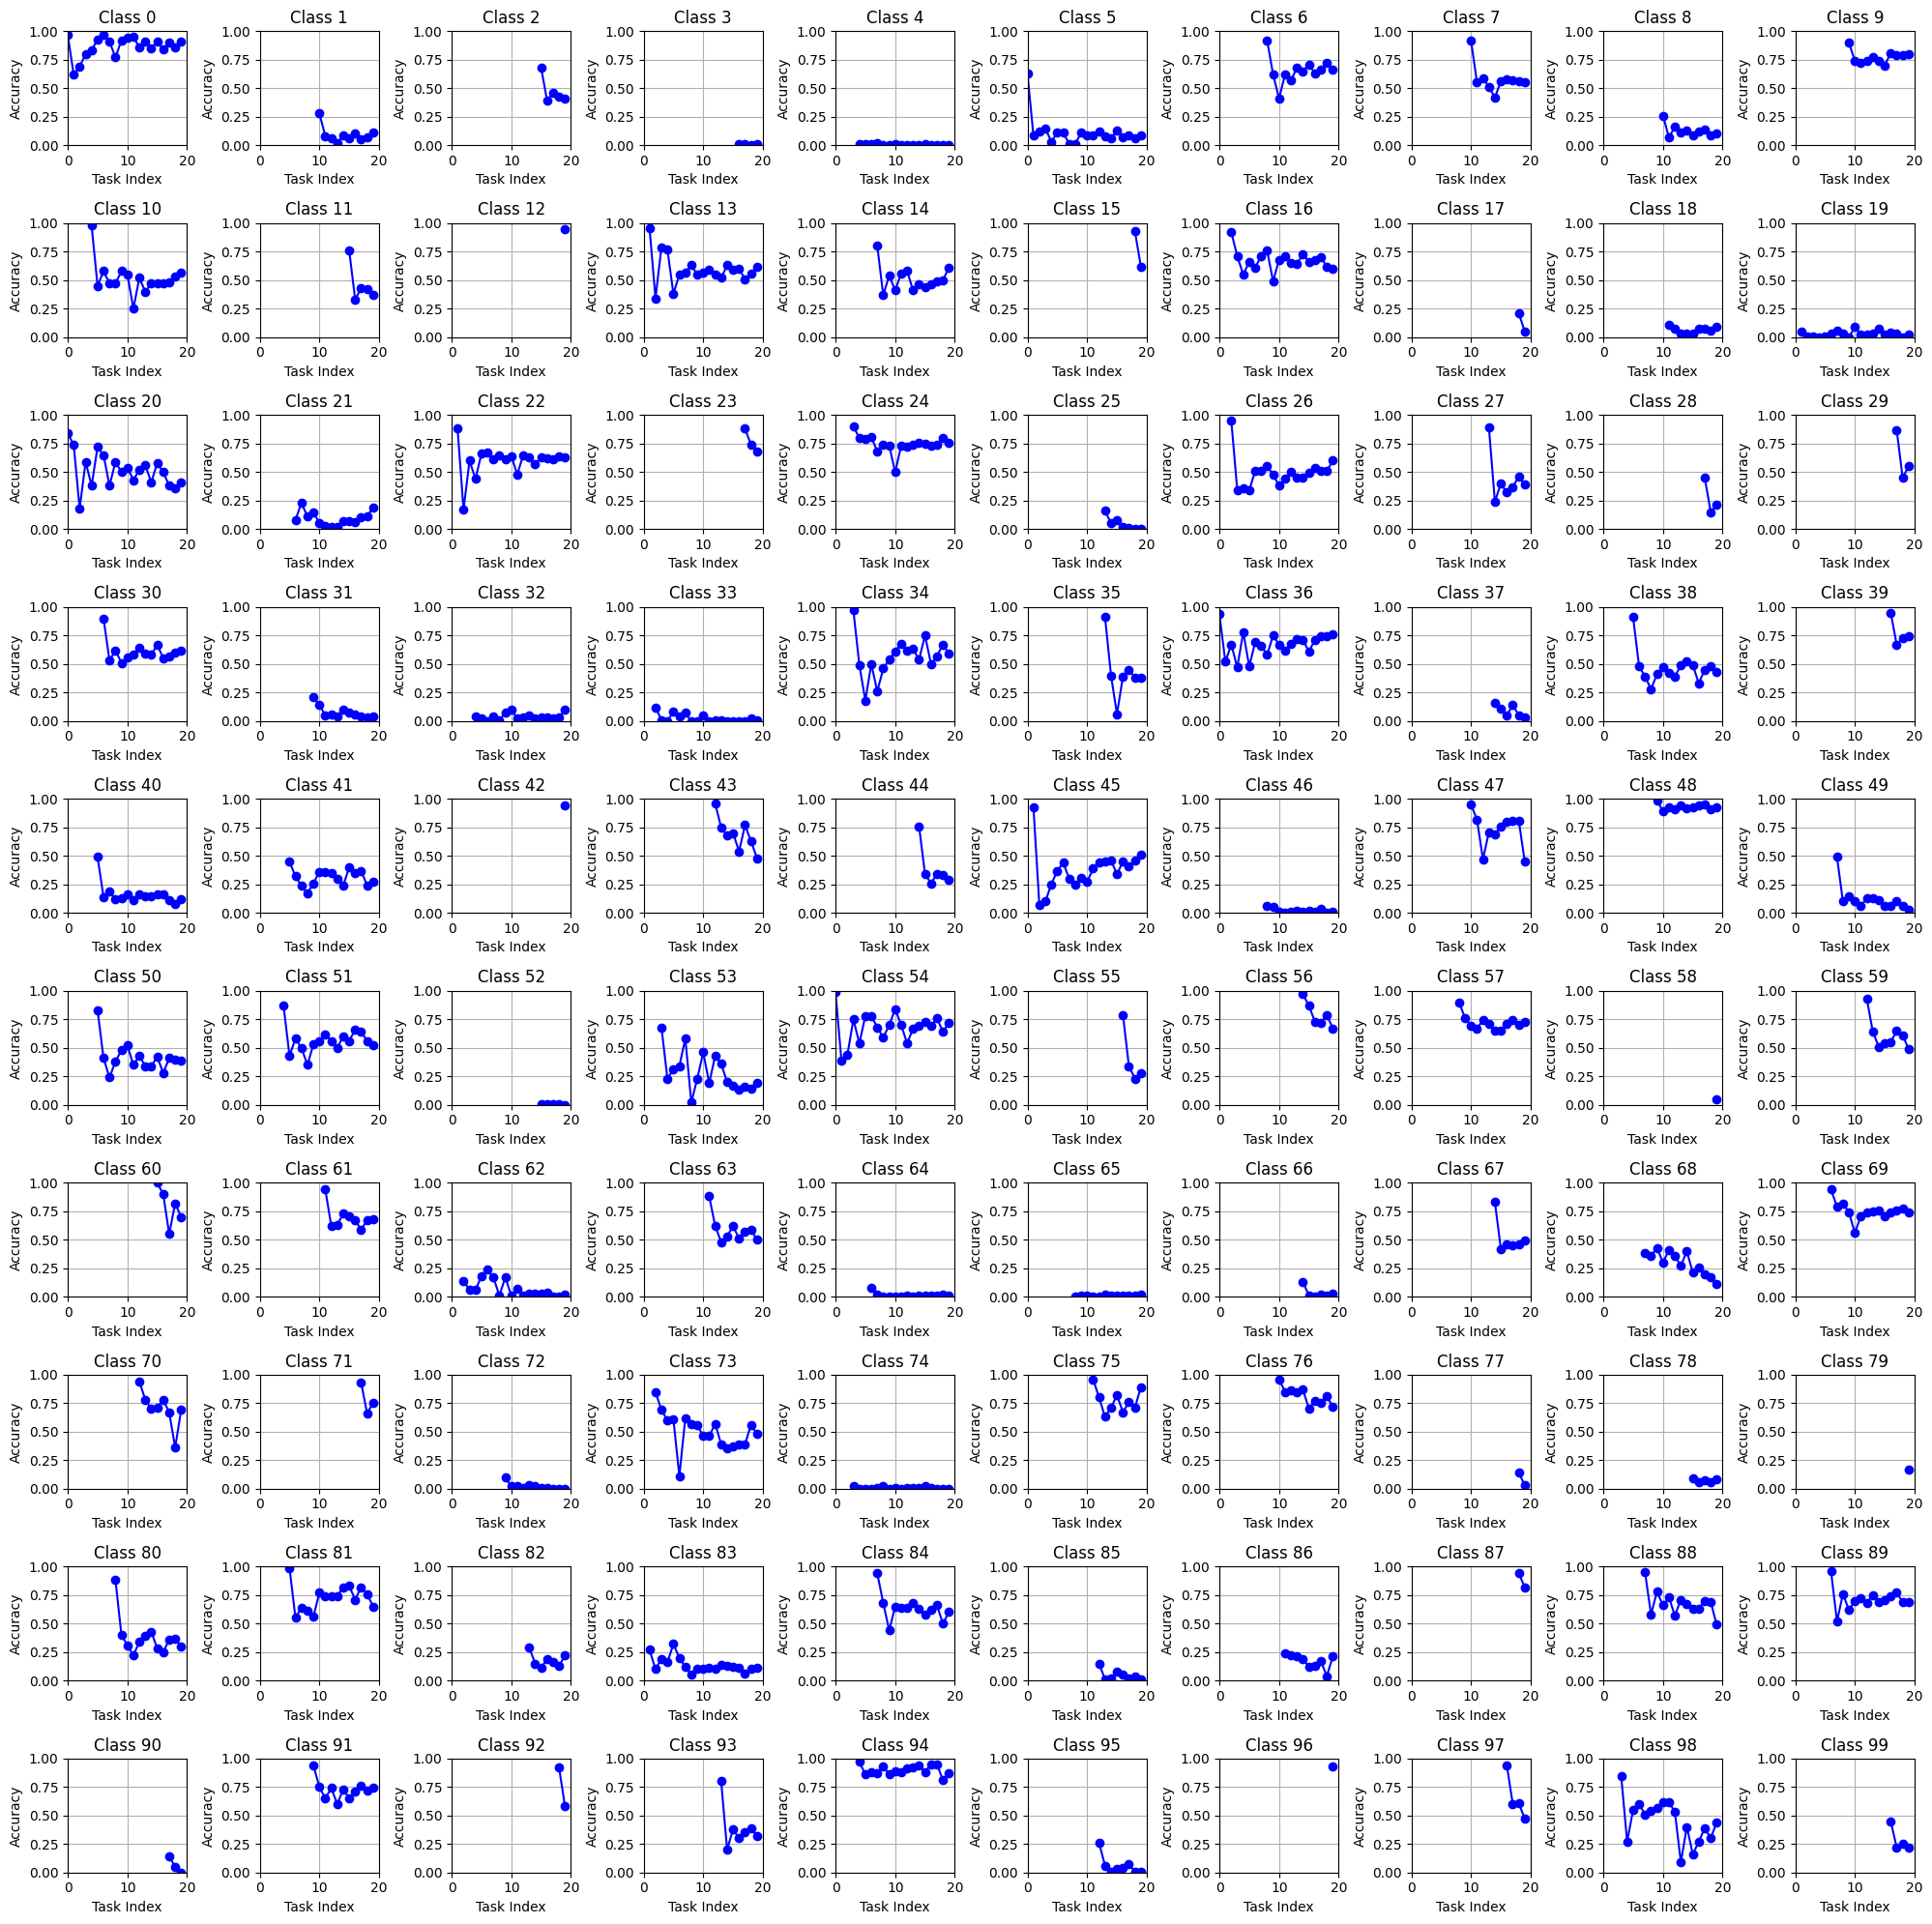

In [9]:
class_accuracies1 = parse_log_file_class('logs/log_real_sythesis_llavaprompt_class_3real_i2i.txt')
dict_test1 = class_accuracies1
outcome1 = truncate_class_accuracies(dict_test1, task2class)
plot_class_accuracies(outcome1, task2class,'figures/log_real_sythesis_llavaprompt_class_3real_i2i.png')


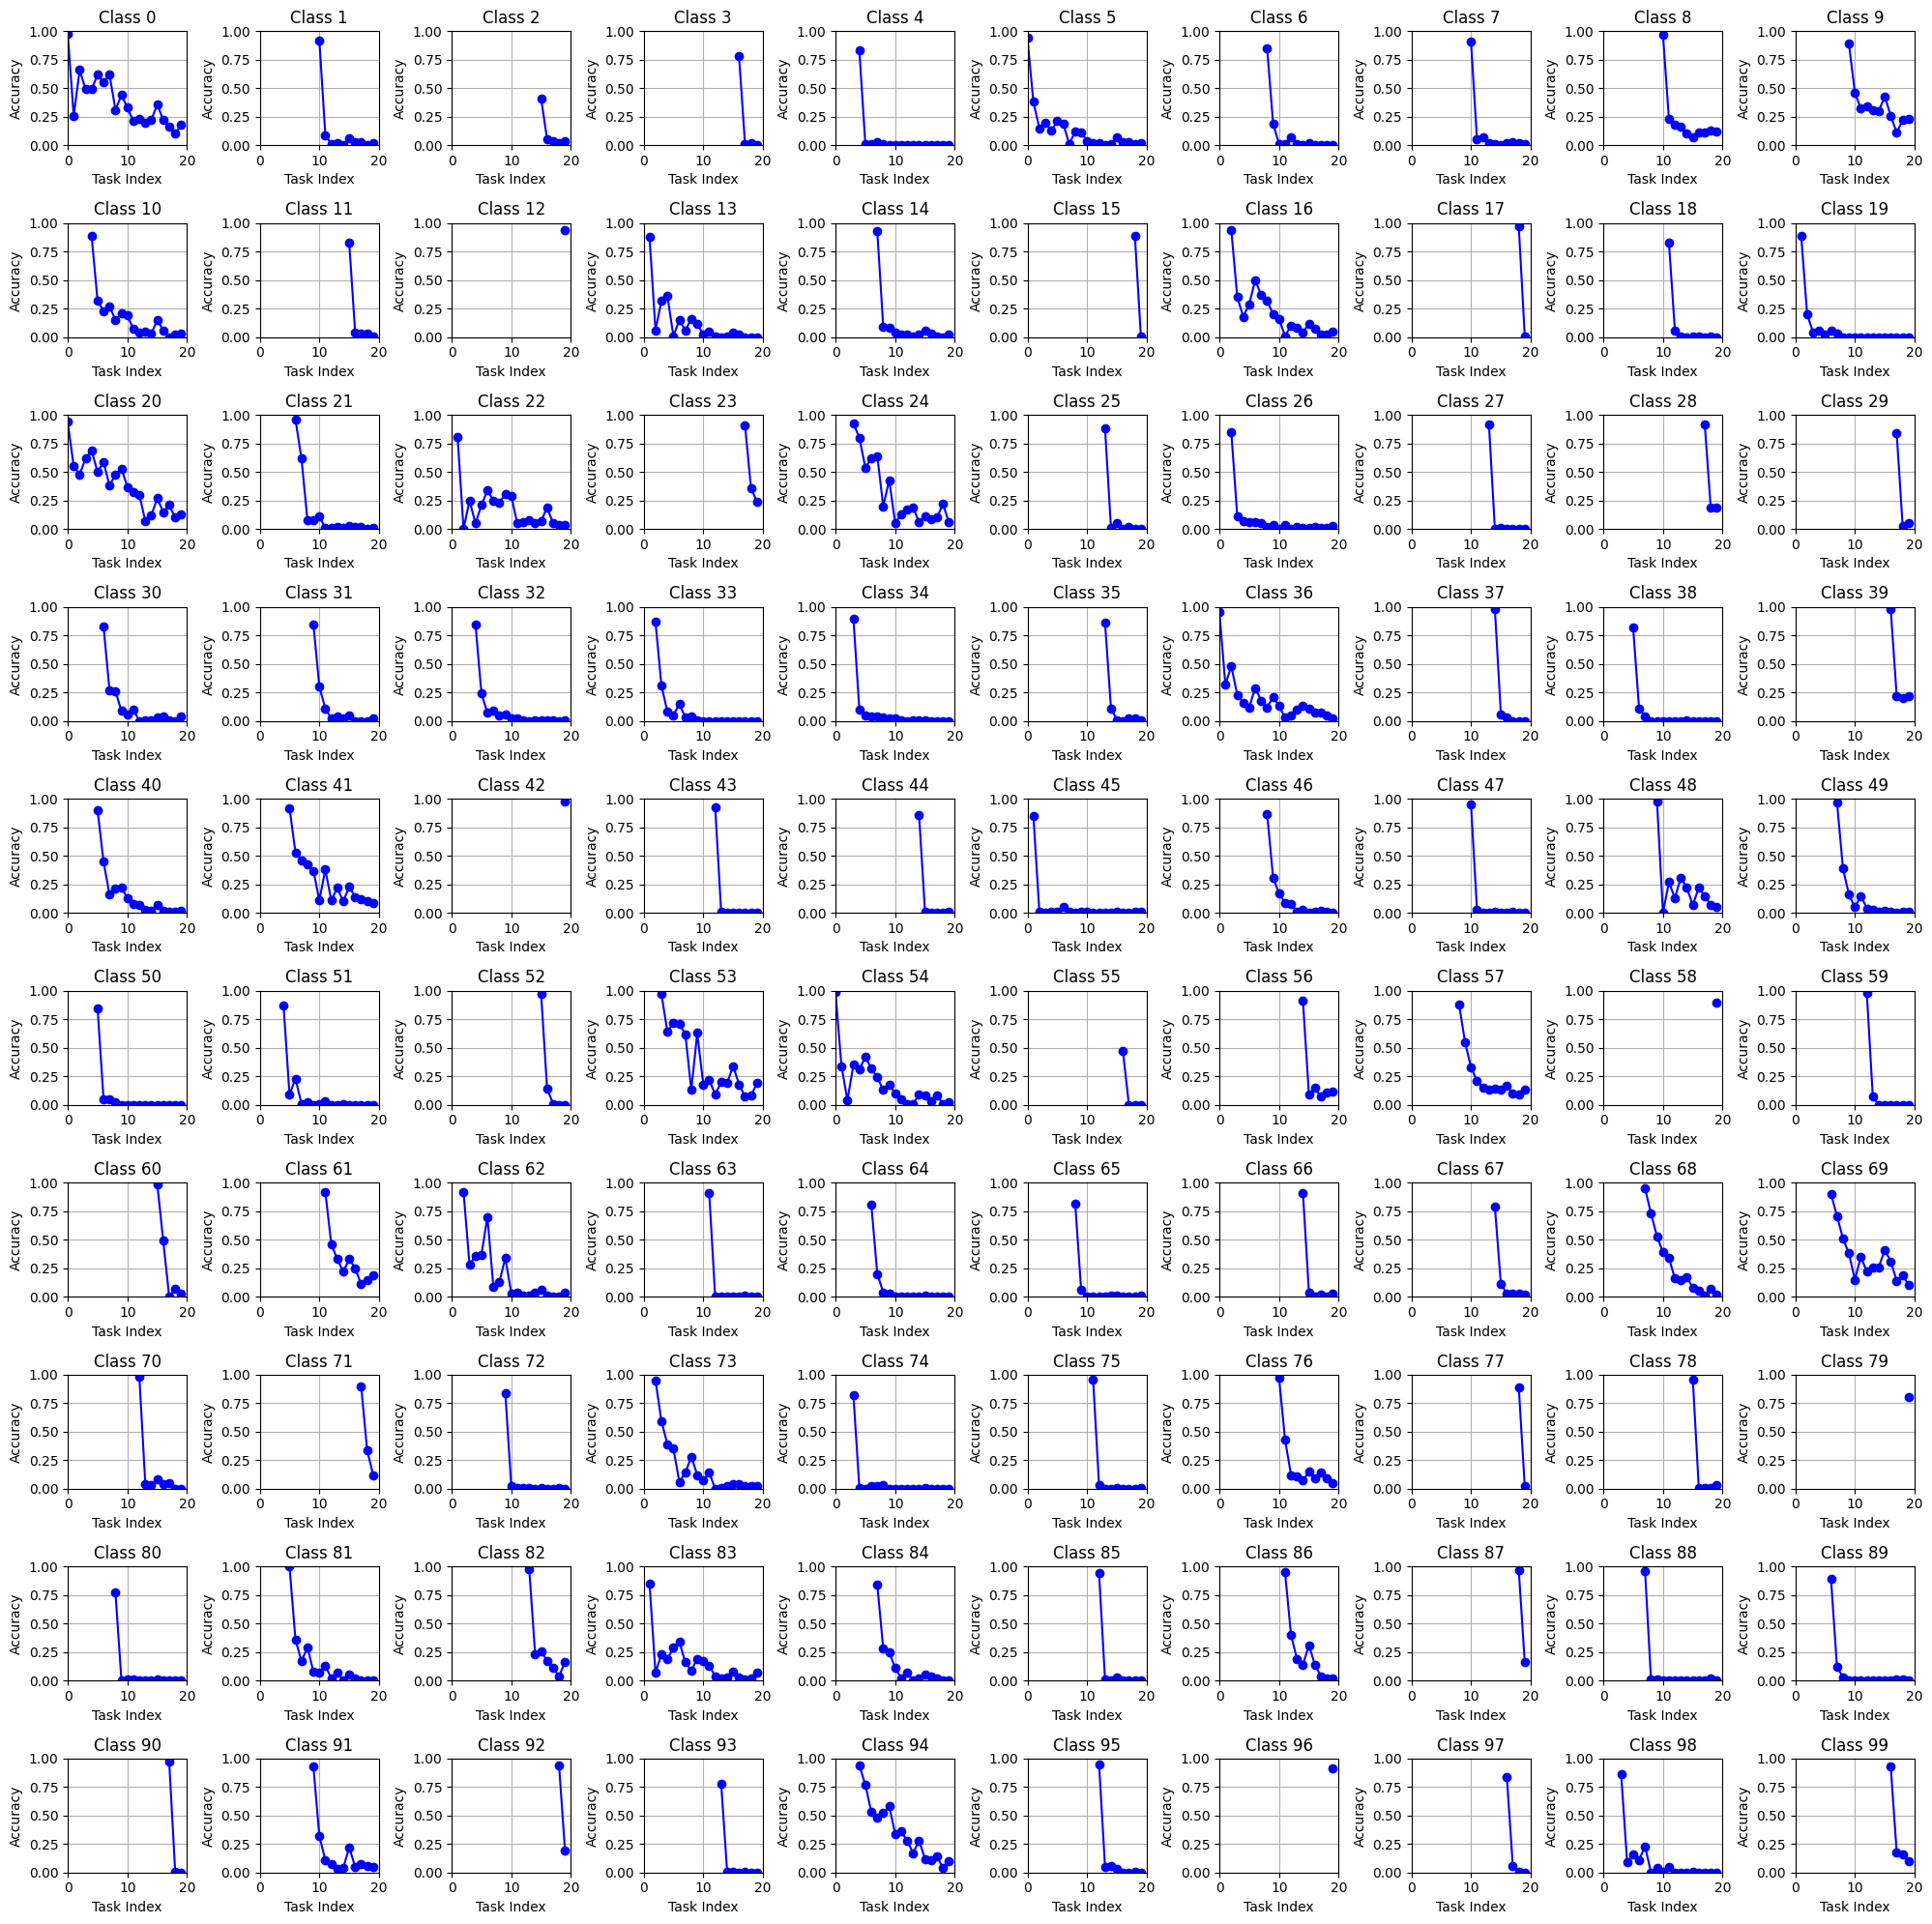

In [8]:
class_accuracies2 = parse_log_file_class('logs/log_turbo_llava_i2i.txt')
dict_test2 = class_accuracies2
outcome2 = truncate_class_accuracies(dict_test2, task2class)
plot_class_accuracies(outcome2, task2class,'figures/log_turbo_llava_i2i.png')


In [29]:
def plot_class_accuracies_comparison(class_accuracies1, class_accuracies2, task_class_dict, saved_name):
    # Set up a figure with a grid of subplots for the 100 classes
    fig, axes = plt.subplots(nrows=10, ncols=10, figsize=(20, 20))
    fig.subplots_adjust(hspace=0.5, wspace=0.3)
    axes = axes.flatten()

    # Initialize the first appearance for each class
    first_appearance = {cls: None for cls in range(100)}
    for task, classes in task_class_dict.items():
        for cls in classes:
            if first_appearance[cls] is None:
                first_appearance[cls] = task

    # Plot accuracies for each class from both configurations
    for cls in range(100):
        ax = axes[cls]
        if cls in class_accuracies1 and cls in class_accuracies2:
            accuracies1 = class_accuracies1[cls]
            accuracies2 = class_accuracies2[cls]
            task_indices = list(range(first_appearance[cls], first_appearance[cls] + len(accuracies1)))

            # Ensure full range from 0 to 19 for x-axis, even if not all tasks have data
            full_range_accuracies1 = [None]*20
            full_range_accuracies2 = [None]*20
            for i, idx in enumerate(task_indices):
                full_range_accuracies1[idx] = accuracies1[i]
                full_range_accuracies2[idx] = accuracies2[i]

            ax.plot(range(20), full_range_accuracies1, marker='o', linestyle='-', color='red', label='llava prompt')
            ax.plot(range(20), full_range_accuracies2, marker='o', linestyle='-', color='blue', label='base prompt')

        ax.set_ylim([0, 1])
        ax.set_xlim([0, 20])
        ax.set_title(f'Class {cls}')
        ax.set_xlabel('Task Index')
        ax.set_ylabel('Accuracy')
        ax.grid(True)

    # Add a single legend for the whole figure
    handles, labels = ax.get_legend_handles_labels()
    fig.legend(handles, labels, loc='lower center', ncol=2, fontsize='large')

    # Save the plot to a file
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to make room for legend
    plt.savefig(saved_name)
    plt.show()

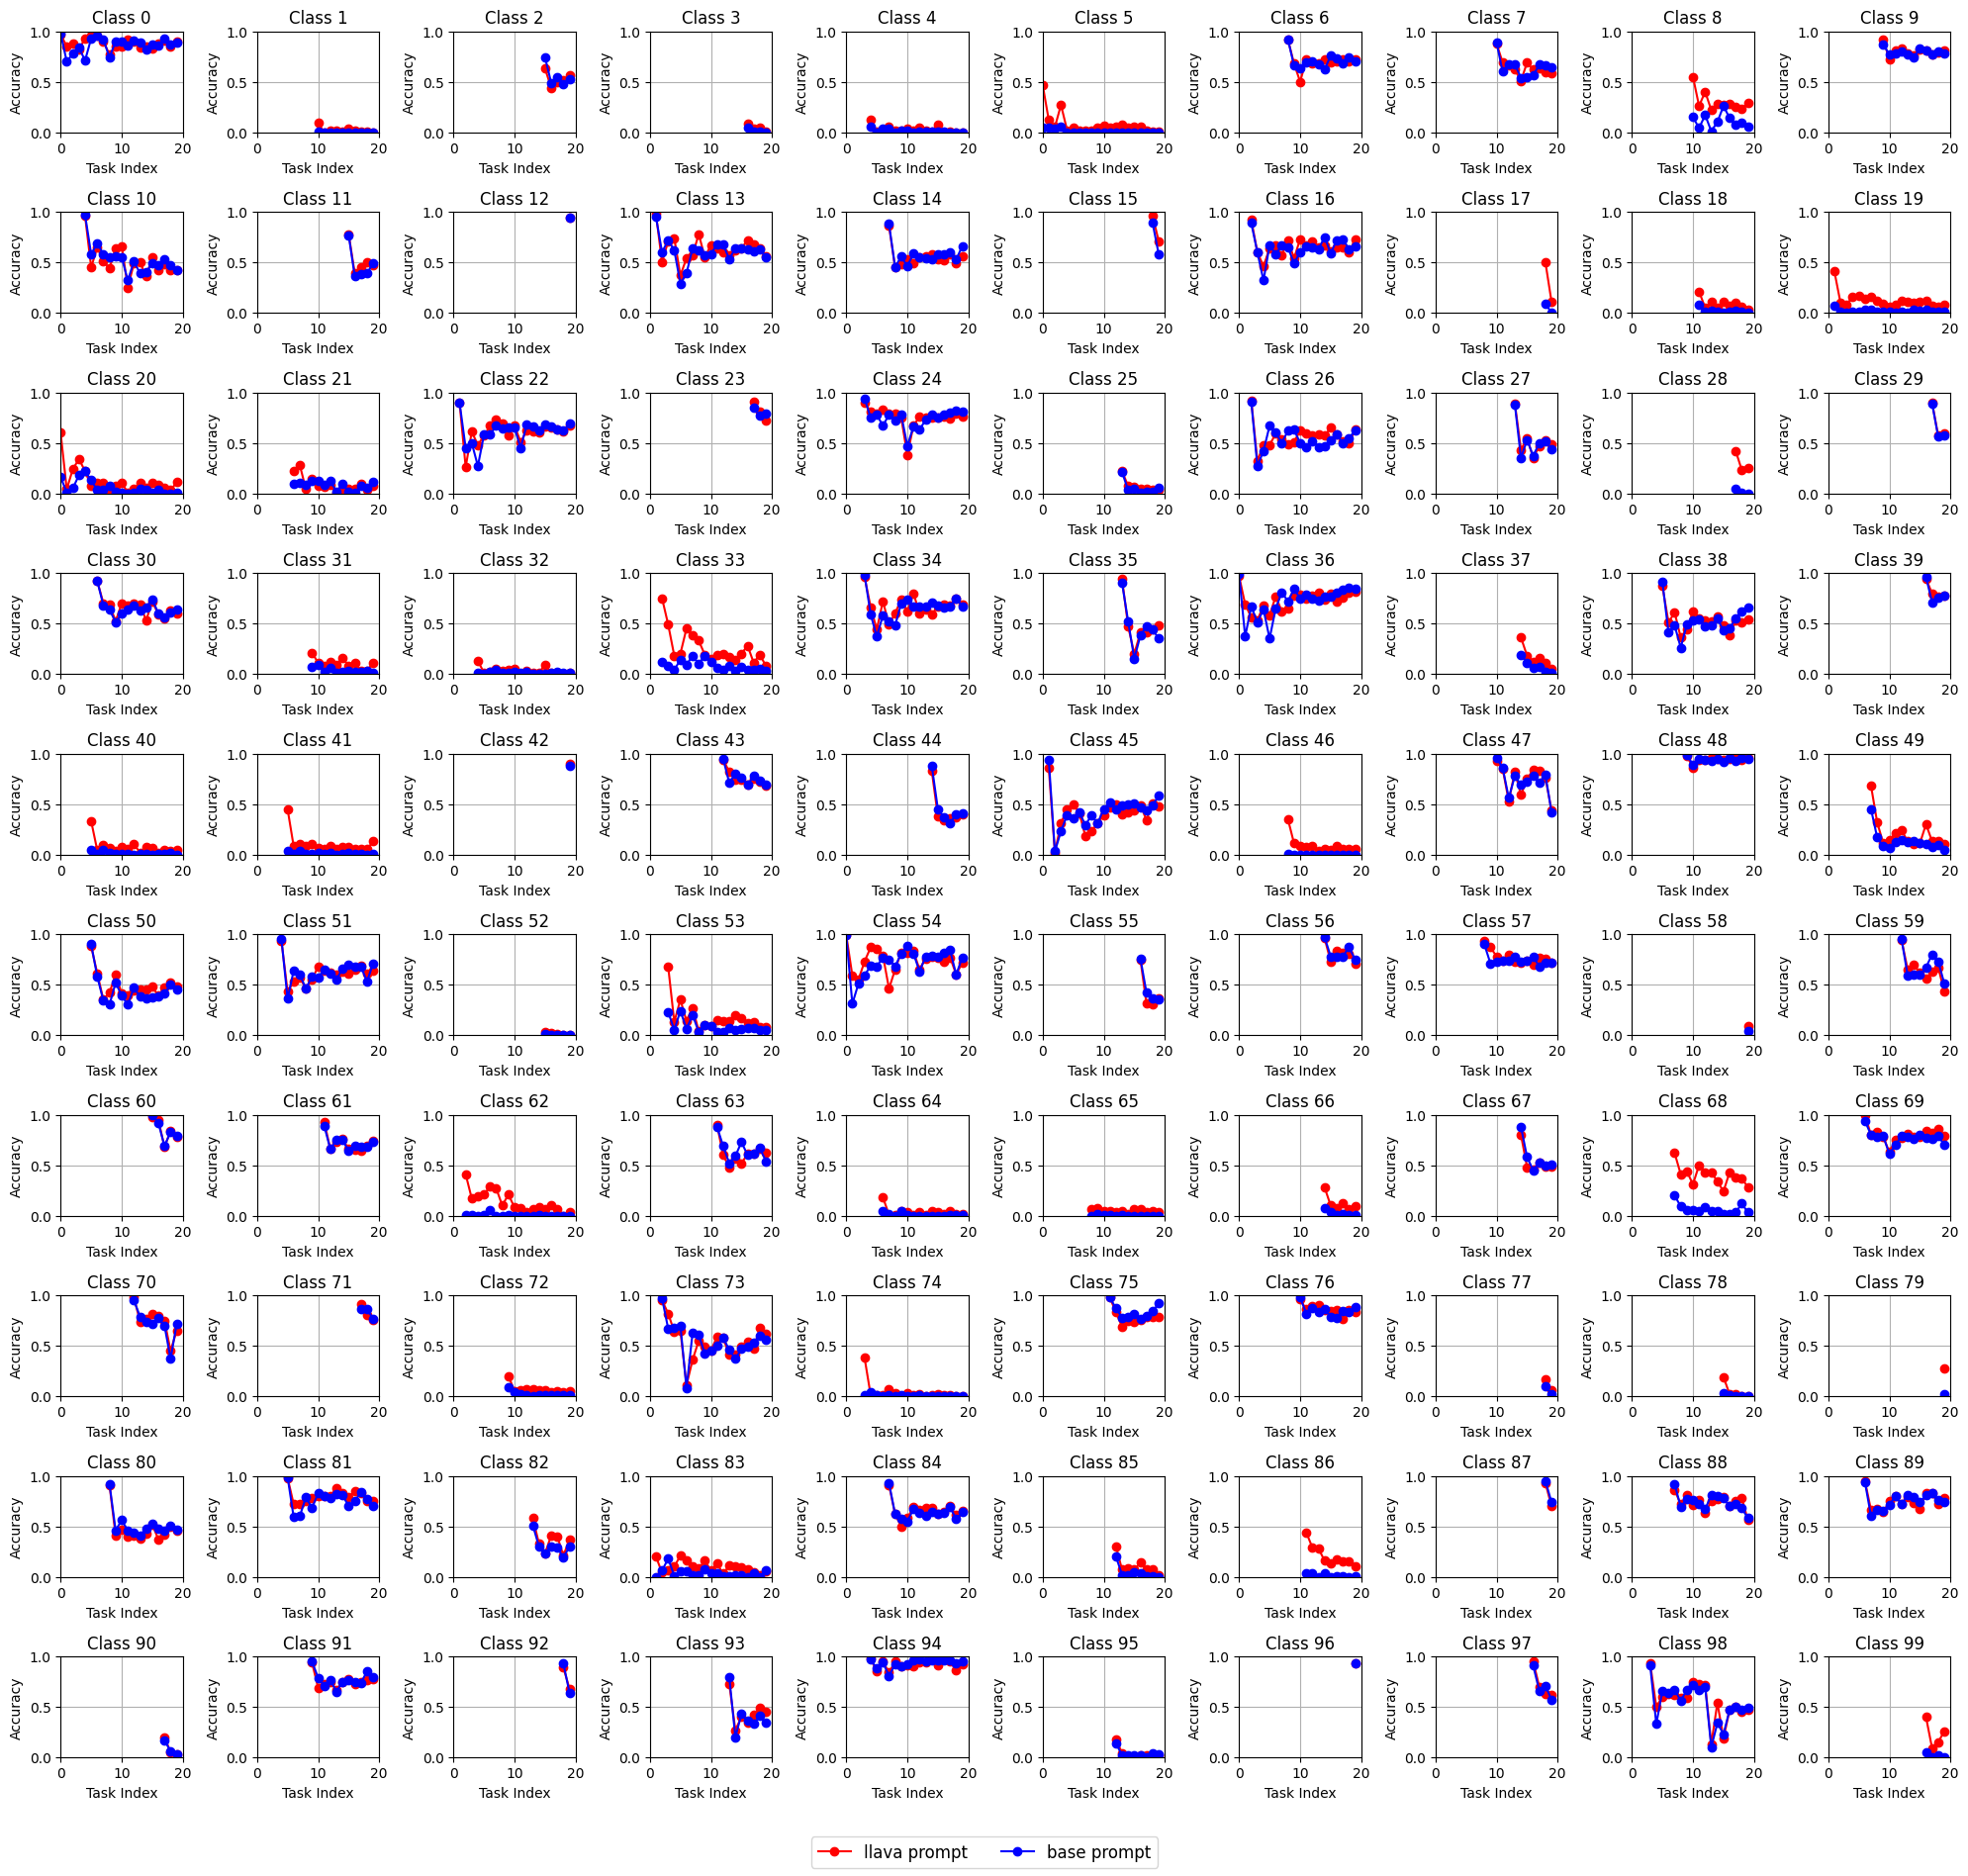

In [30]:
plot_class_accuracies_comparison(outcome1, outcome2, task2class,'figures/mixed_base_llava_prompt.png')


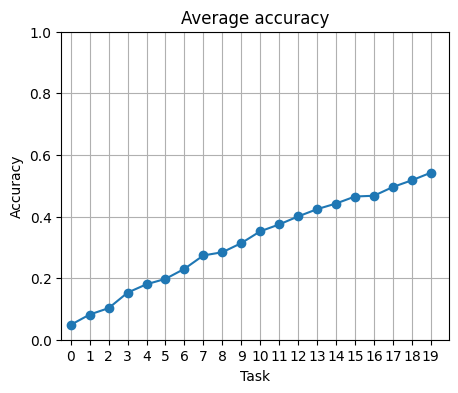

In [11]:
plot_task_accuracies_average(accuracies2, 're_method1_avg.png')

In [4]:
import matplotlib.pyplot as plt

def plot_losses2(losses1, losses2, title, label1='Run 1 Loss', label2='Run 2 Loss'):
    """
    Plots the training losses from two experimental runs.

    Parameters:
    - losses1: List of losses from the first run.
    - losses2: List of losses from the second run.
    - label1: Label for the first run.
    - label2: Label for the second run.
    """
    plt.figure(figsize=(5, 4))
    plt.plot(losses1, label=label1, marker='o')
    plt.plot(losses2, label=label2, marker='x')
    plt.title(title)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

def plot_losses(losses1, label1='Run 1 Loss'):
    """
    Plots the training losses from two experimental runs.

    Parameters:
    - losses1: List of losses from the first run.
    - losses2: List of losses from the second run.
    - label1: Label for the first run.
    - label2: Label for the second run.
    """
    plt.figure(figsize=(5, 4))
    plt.plot(losses1, label=label1, marker='o')
#     plt.title(title)
    plt.xlabel('# tasks')
    plt.ylabel('Accuarcy')
    plt.legend()
    plt.grid(True)
    plt.show()

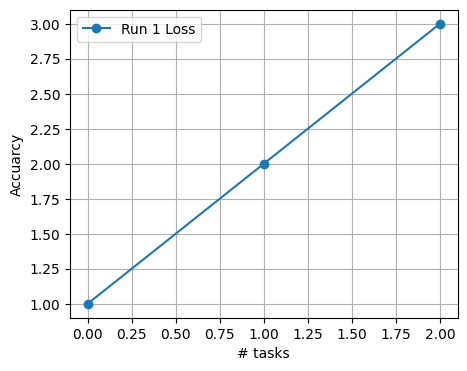

In [2]:
acc1 = [1,2,3]
plot_losses(acc1)

In [3]:
def plot_accuracy(start_from, accuracy):
    import matplotlib.pyplot as plt

    # Sample data
    x_values = [i for i in range(start_from, 6)]  # Starts at 1
    y_values = accuracy

    plt.figure(figsize=(6, 3))
    plt.plot(x_values, y_values, marker='o')
    
    plt.xlim(left=0.5) 
    plt.ylim(0.8, 1)

    plt.xticks(range(1, 6))

    plt.show()

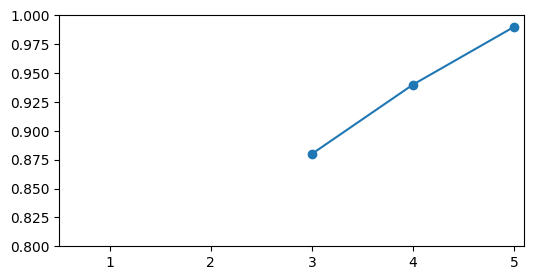

In [4]:
plot_accuracy(3, [0.88, 0.94, 0.99])

In [ ]:
acc2_resample = [
    [99.95271867612293, 99.95, 99.95, 99.8581560283688, 99.29078014184397],
    [97.15, 93.92, 64.00587659157688, 51.86092066601371],
    [91.89, 78.28175026680897, 84.20490928495198],
    [56.49546827794562, 66.51560926485398],
    [87.74583963691377],
    [99.95271867612293, 94.22660572528265, 82.04277897529431, 74.9407509043283, 77.98]
]

acc2 = [
    [99.52718676122932, 99.43262411347517, 98.95981087470449, 99.8581560283688, 99.29078014184397],
    [88.83447600391773, 61.80215475024486, 64.00587659157688, 51.86092066601371],
    [85.00533617929563, 78.28175026680897, 84.20490928495198],
    [56.49546827794562, 66.51560926485398],
    [87.74583963691377],
    [99.52718676122932, 94.22660572528265, 82.04277897529431, 74.9407509043283, 77.98]
]

acc3 = [
    [99.52718676122932, 99.43262411347517, 98.95981087470449, 99.8581560283688, 99.29078014184397],
    [88.83447600391773, 61.80215475024486, 64.00587659157688, 51.86092066601371],
    [85.00533617929563, 78.28175026680897, 84.20490928495198],
    [56.49546827794562, 66.51560926485398],
    [87.74583963691377],
    [99.52718676122932, 94.22660572528265, 82.04277897529431, 74.9407509043283, 77.98]
]



[[0.9990543735224587, 0.9990543735224587, 0.9990543735224587, 0.9990543735224587, 0.9990543735224587], [0.955435847208619, 0.9534769833496571, 0.9564152791381, 0.955435847208619], [0.9727854855923159, 0.9727854855923159, 0.9786552828175027], [0.9949647532729103, 0.9929506545820744], [0.9586485123550176], [0.9990543735224587, 0.9776280971854703, 0.9754601226993865, 0.9810402893850568, 0.9771]]


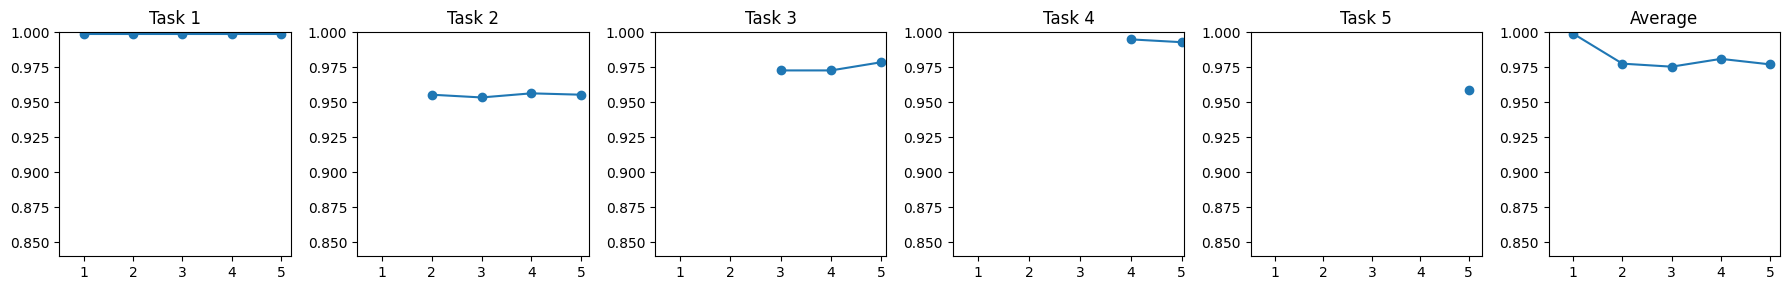

In [10]:
import matplotlib.pyplot as plt

# Sample accuracies for 6 tasks
accuracies = [[99.90543735224587, 99.90543735224587, 99.90543735224587, 99.90543735224587, 99.90543735224587], [95.5435847208619, 95.34769833496571, 95.64152791381, 95.5435847208619], [97.2785485592316, 97.2785485592316, 97.86552828175027], [99.49647532729104, 99.29506545820745], [95.86485123550176], [99.90543735224587, 97.76280971854703, 97.54601226993866, 98.10402893850568, 97.71]]

accuracies = [[item/100 for item in accuracy] for accuracy in accuracies]

print(accuracies)
    

# Set up the figure and axes
fig, axes = plt.subplots(nrows=1, ncols=6, figsize=(18, 3))  # 6 images in a row


# Plot each set of accuracies in a subplot
for idx, (ax, accuracy) in enumerate(zip(axes, accuracies)):
    if idx < 5:
        x_values = [i for i in range(idx+1, 6)]  # X values based on accuracy length
        y_values = accuracy

        ax.plot(x_values, y_values, marker='o')

        ax.set_xlim(left=0.5) 
        ax.set_ylim(0.84, 1)

        ax.set_xticks(range(1, 6))
        ax.set_title(f"Task {idx + 1}")

    # Optional: Set titles for each subplot
    else:
        x_values = [i for i in range(1,6)]  # X values based on accuracy length
        y_values = accuracy

        ax.plot(x_values, y_values, marker='o')

        ax.set_xlim(left=0.5) 
        ax.set_ylim(0.84, 1)

        ax.set_xticks(range(1, 6))
        ax.set_title("Average")

# Adjust layout to prevent overlapping
plt.tight_layout()

# Save the plot to a file
# plt.savefig('/mnt/data/accuracy_plots.png')

# Display the plot in the output
plt.show()


In [29]:
def plot_start_from_middle(acc1, acc2, acc3, acc4, acc5, acc6):
    acc1 = [[item/100 for item in accuracy] for accuracy in acc1]
    acc2 = [[item/100 for item in accuracy] for accuracy in acc2]
    acc3 = [[item/100 for item in accuracy] for accuracy in acc3]
    acc4 = [[item/100 for item in accuracy] for accuracy in acc4]
    acc5 = [[item/100 for item in accuracy] for accuracy in acc5]
    acc6 = [[item/100 for item in accuracy] for accuracy in acc6]
    # Set up the figure and axes
    fig, axes = plt.subplots(nrows=1, ncols=6, figsize=(18, 3))  # 6 images in a row


    # Plot each set of accuracies in a subplot
    for idx, (ax, a1, a2, a3, a4, a5, a6) in enumerate(zip(axes, acc1, acc2, acc3, acc4, acc5, acc6)):
        if idx < 5:
            x_values = [i for i in range(idx+1, 6)]  # X values based on accuracy length
            y1 = a1
            y2 = a2
            y3 = a3
            y4 = a4
            y5 = a5
            y6 = a6

            ax.plot(x_values, y1, marker='o', label = 'VCL+Corset')
            ax.plot(x_values, y2, marker='^', label = 'VCL+Resampled Corset')
            ax.plot(x_values, y3, marker='x', label = 'VCL+Ordered-Max Similar')
            ax.plot(x_values, y4, color = 'blue',marker='D', label = 'VCL+Ordered-Max Dissimilar')
            ax.plot(x_values, y5, marker='o', label = 'VCL+Scaling Factor')
            ax.plot(x_values, y6,color = 'red',marker='s', label = 'VCL+Ordered-Max Dissimilar+Scaling Factor')


            ax.set_xlim(left=0.5) 
            ax.set_ylim(0.89, 1.01)

            ax.set_xticks(range(1, 6))
            ax.set_title(f"Task {idx + 1}")
            if idx == 0:
                ax.set_ylabel('Accuarcy')

        # Optional: Set titles for each subplot
        else:
            x_values = [i for i in range(1,6)]  # X values based on accuracy length
            y1 = a1
            y2 = a2
            y3 = a3
            y4 = a4
            y5 = a5
            y6 = a6

            ax.plot(x_values, y1, marker='o', label = 'VCL+Corset')
            ax.plot(x_values, y2, marker='^', label = 'VCL+Resampled Corset')
            ax.plot(x_values, y3, marker='x', label = 'VCL+Ordered-Max Similar')
            ax.plot(x_values, y4,color = 'blue', marker='+', label = 'VCL+Ordered-Max Dissimilar')
            ax.plot(x_values, y5, marker='o', label = 'VCL+Scaling Factor')
            ax.plot(x_values, y6,color = 'red', marker='s', label = 'VCL+Ordered-Max Dissimilar+Scaling Factor')

            ax.set_xlim(left=0.5) 
            ax.set_ylim(0.89, 1.01)

            ax.set_xticks(range(1, 6))
            ax.set_title("Average")

# #     ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    
#     plt.tight_layout()
#     ax.legend(loc='upper center'
# #               , bbox_to_anchor=(0.5, 1.05),
#              )
    
#     plt.show()
    handles, labels = ax.get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper center', ncol=6, bbox_to_anchor=(0.5, 1.00))

    plt.tight_layout(rect=[0, 0, 1, 0.90])  # Adjust the rect to make space for the legend
    plt.savefig('accuracy_plot.png',dpi = 600)
    plt.show()


    

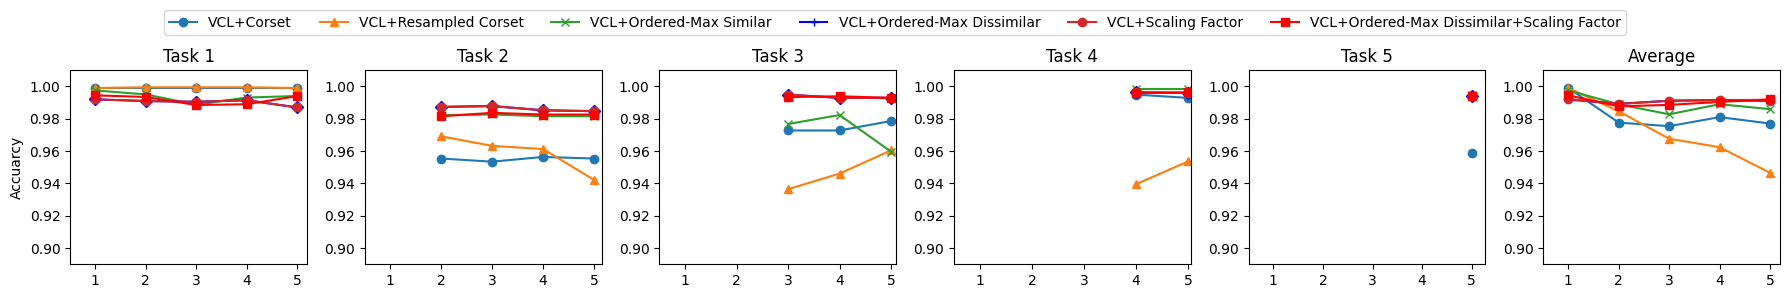

In [30]:
acc1 = [[99.90543735224587, 99.90543735224587, 99.90543735224587, 99.90543735224587, 99.90543735224587], [95.5435847208619, 95.34769833496571, 95.64152791381, 95.5435847208619], [97.2785485592316, 97.2785485592316, 97.86552828175027], [99.49647532729104, 99.29506545820745], [95.86485123550176], [99.90543735224587, 97.76280971854703, 97.54601226993866, 98.10402893850568, 97.71]]

acc_random = [[99.90543735224587, 99.95271867612293, 99.95271867612293, 99.95271867612293, 99.90543735224587], [96.91478942213516, 96.32713026444662, 96.13124387855044, 94.22135161606268], [93.64994663820704, 94.61045891141943, 96.05122732123799], [93.95770392749245, 95.36757301107754], [87.49369641956632], [99.90543735224587, 98.4604281934087, 96.76670535566241, 96.24547835848821, 94.66]]

acc_order_similar = [[99.75514201762978, 99.51028403525955, 98.87365328109696, 99.31439764936337, 99.41234084231147], [98.21621621621621, 98.27027027027027, 98.16216216216216, 98.16216216216216], [97.68028240040343, 98.23499747856782, 95.96570852244075], [99.84709480122324, 99.84709480122324], [99.4914470642626], [99.75514201762978, 98.89516957862281, 98.28085106382979, 98.90264131683043, 98.6]]

acc_order_dissimilar = [[99.2023928215354, 99.10269192422732, 99.05284147557327, 99.15254237288136, 98.70388833499501], [98.73750657548659, 98.79011046817465, 98.52709100473434, 98.47448711204629], [99.49647532729104, 99.29506545820745, 99.29506545820745], [99.64322120285424, 99.59225280326197], [99.44055944055944], [99.2023928215354, 98.92500639877143, 99.11759714916002, 99.15977084659453, 99.11]]

acc_scale = [[99.95271867612293, 99.95271867612293, 99.95271867612293, 99.90543735224587, 99.90543735224587], [97.94319294809011, 97.35553379040157, 97.25759059745347, 96.42507345739472], [99.51974386339381, 99.41302027748132, 99.09284951974387], [99.69788519637463, 98.99295065458207], [97.52899646999495], [99.95271867612293, 98.96560019244647, 98.93881611673022, 99.06448796307846, 98.39]]

acc_dis_scale = [[99.45164506480559, 99.3519441674975, 98.85343968095712, 98.90329012961116, 99.40179461615155], [98.15886375591793, 98.36927932667017, 98.26407154129406, 98.26407154129406], [99.34541792547834, 99.39577039274924, 99.29506545820745], [99.59225280326197, 99.64322120285424], [99.39393939393939], [99.45164506480559, 98.77143588431021, 98.86305786526387, 99.04519414385742, 99.21]]
plot_start_from_middle(acc1, acc_random, acc_order_similar, acc_order_dissimilar, acc_order_dissimilar, acc_dis_scale)

## images

In [1]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def display_images_in_grid(folder_path, num_images=25, grid_size=(5, 5)):
    """
    Display a grid of images randomly sampled from a folder, with image class labels below each image.

    Args:
    folder_path (str): The path to the folder containing images.
    num_images (int): Number of images to sample and display.
    grid_size (tuple): Dimensions of the grid (rows, columns) for displaying the images.
    """
    # Ensure the folder exists and is a directory
    if not os.path.isdir(folder_path):
        print("The specified path is not a valid directory.")
        return
    
    # Get all files in the directory and filter for image files
    all_files = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]
    image_files = [f for f in all_files if f.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp'))]

    # Randomly select files
    if len(image_files) < num_images:
        print("Not enough image files to sample from.")
        return
#     random.seed(42)
    sampled_files = random.sample(image_files, num_images)

    # Plot images in a grid
    fig, axes = plt.subplots(nrows=grid_size[0], ncols=grid_size[1], figsize=(15, 15))
    fig.suptitle('Sampled Images', fontsize=16)

    for ax, image_file in zip(axes.flat, sampled_files):
        image_path = os.path.join(folder_path, image_file)
        img = mpimg.imread(image_path)
        ax.imshow(img)
        ax.axis('off')  # Hide axes
        # Use the image file name as the label below the image
        ax.set_title(image_file.split('.')[0], fontsize=10, y=-0.2)  # Adjust placement to appear below the image

    plt.tight_layout(pad=3.0)  # Adjust layout to make room for labels below images
    plt.show()



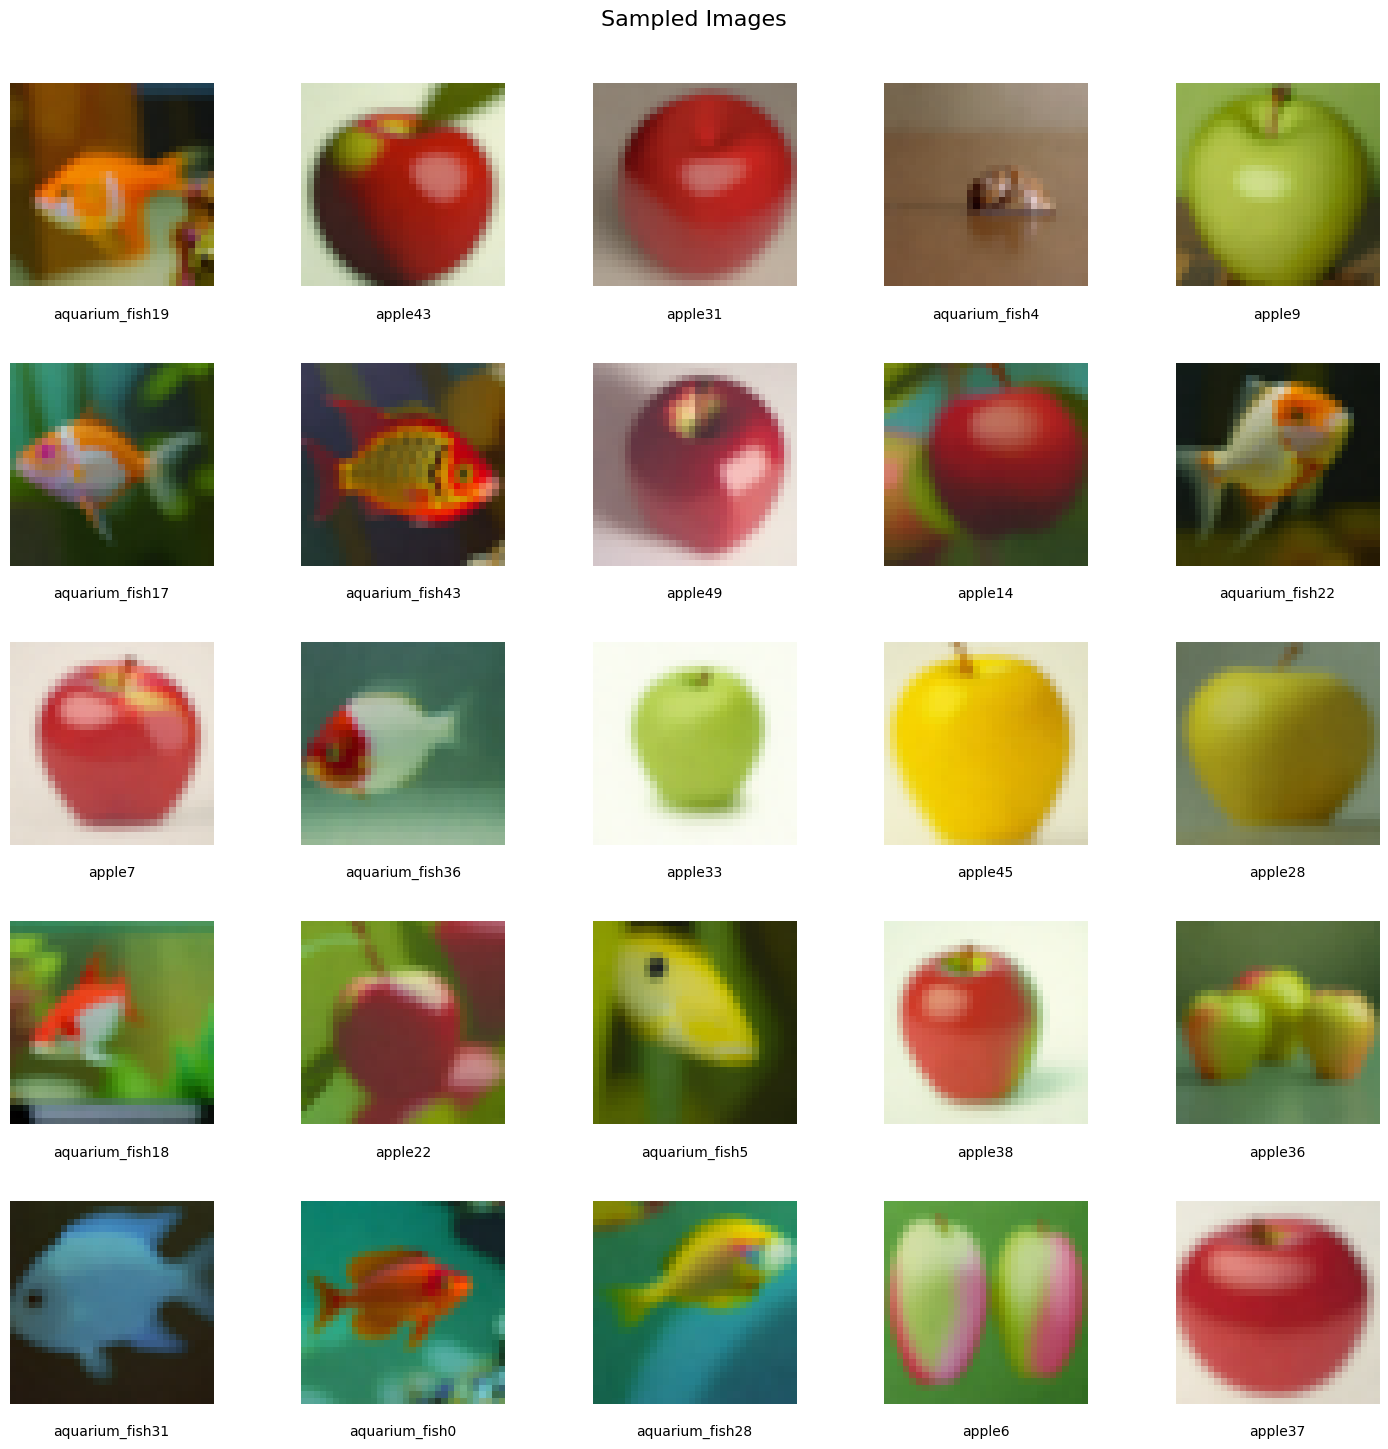

In [4]:

# Example usage
folder_path = 'saved_data/sd_turbo_i2i_50all_step10'
display_images_in_grid(folder_path)


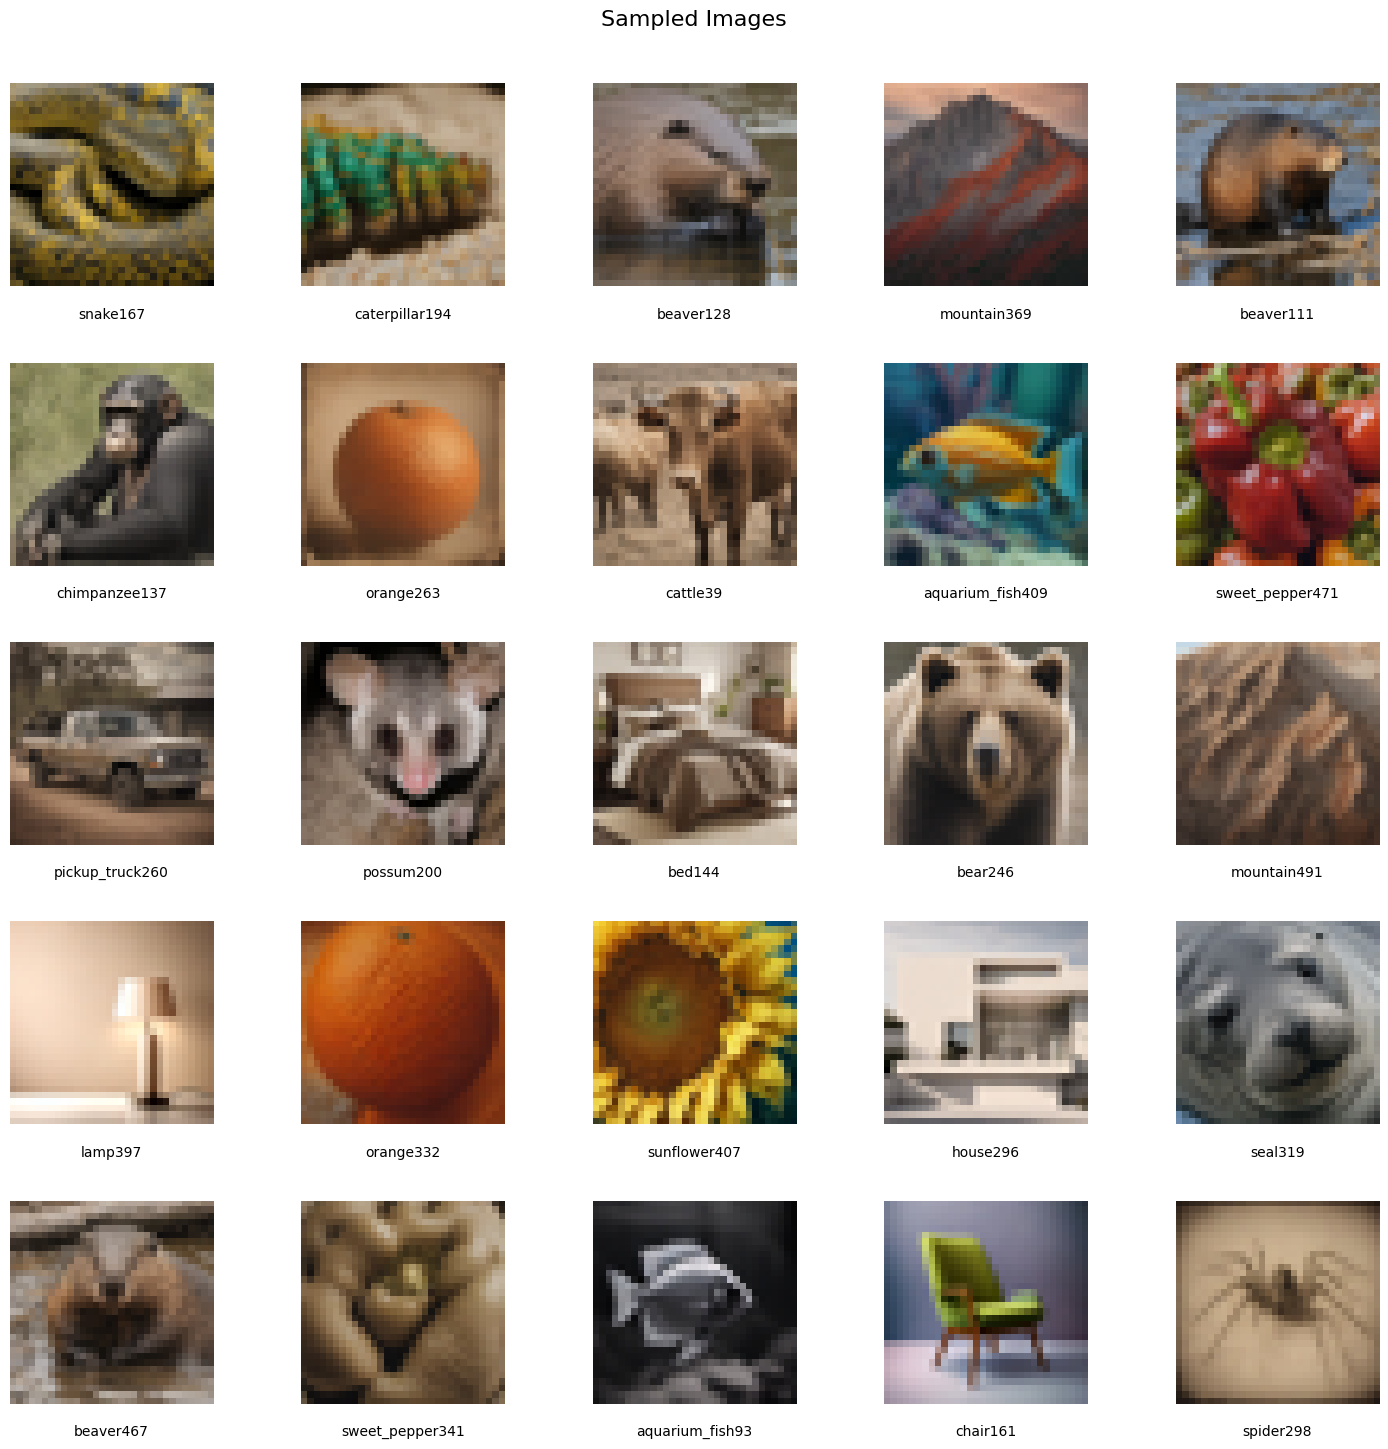

In [4]:
# Example usage
folder_path = 'saved_data/sd_turbo_500images'
display_images_in_grid(folder_path)


In [33]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def display_images_from_classes(folder_path, classes, num_images=9, grid_size=(3, 3)):
    """
    Display a grid of images sampled from specific classes in a folder.

    Args:
    folder_path (str): Path to the folder containing images.
    classes (list): List of class names to include in the sampling.
    num_images (int): Number of images to sample and display.
    grid_size (tuple): Dimensions of the grid (rows, columns) for displaying images.
    """
    # Ensure the folder exists and is a directory
    if not os.path.isdir(folder_path):
        print("The specified path is not a valid directory.")
        return

    # Get all files in the directory and filter for image files that start with any of the specified class names
    all_files = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]
    filtered_files = [f for f in all_files if any(f.startswith(cls) for cls in classes) and f.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp'))]

    # Randomly select files
    if len(filtered_files) < num_images:
        print(f"Not enough image files to sample from. Found only {len(filtered_files)} files.")
        return
    random.seed(42)
    sampled_files = random.sample(filtered_files, num_images)

    # Plot images in a grid
    fig, axes = plt.subplots(nrows=grid_size[0], ncols=grid_size[1], figsize=(15, 15))
    fig.suptitle('Sampled Images from Specific Classes', fontsize=16)

    for ax, image_file in zip(axes.flat, sampled_files):
        image_path = os.path.join(folder_path, image_file)
        img = mpimg.imread(image_path)
        ax.imshow(img)
        ax.axis('off')  # Hide axes
        ax.set_title(image_file.split('_')[0], fontsize=10, y=-0.15)  # Display the class part of the filename

    plt.tight_layout(pad=3.0)  # Adjust layout to make room for class labels
    plt.show()


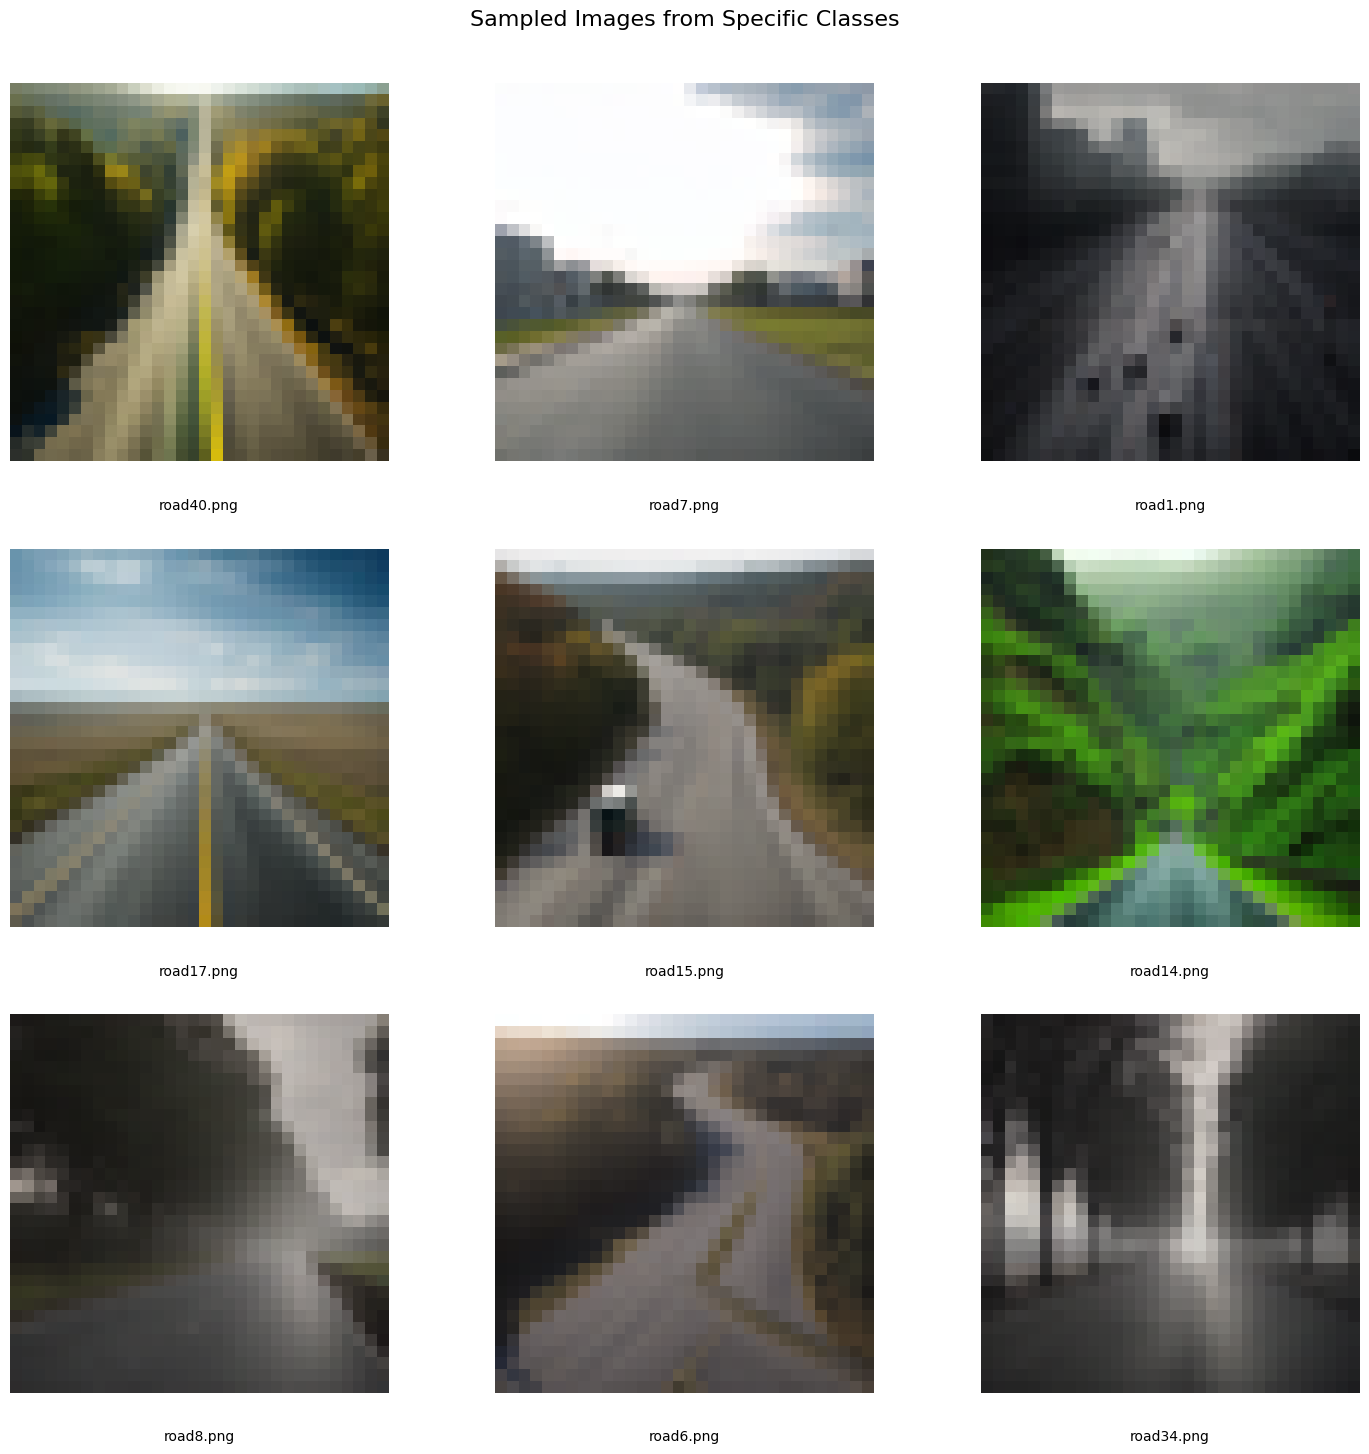

In [34]:
# Example usage
folder_path = 'saved_data/sd_turbo_50_llavaprompt'
classes = ['road']  # Replace with actual class names
display_images_from_classes(folder_path, classes)


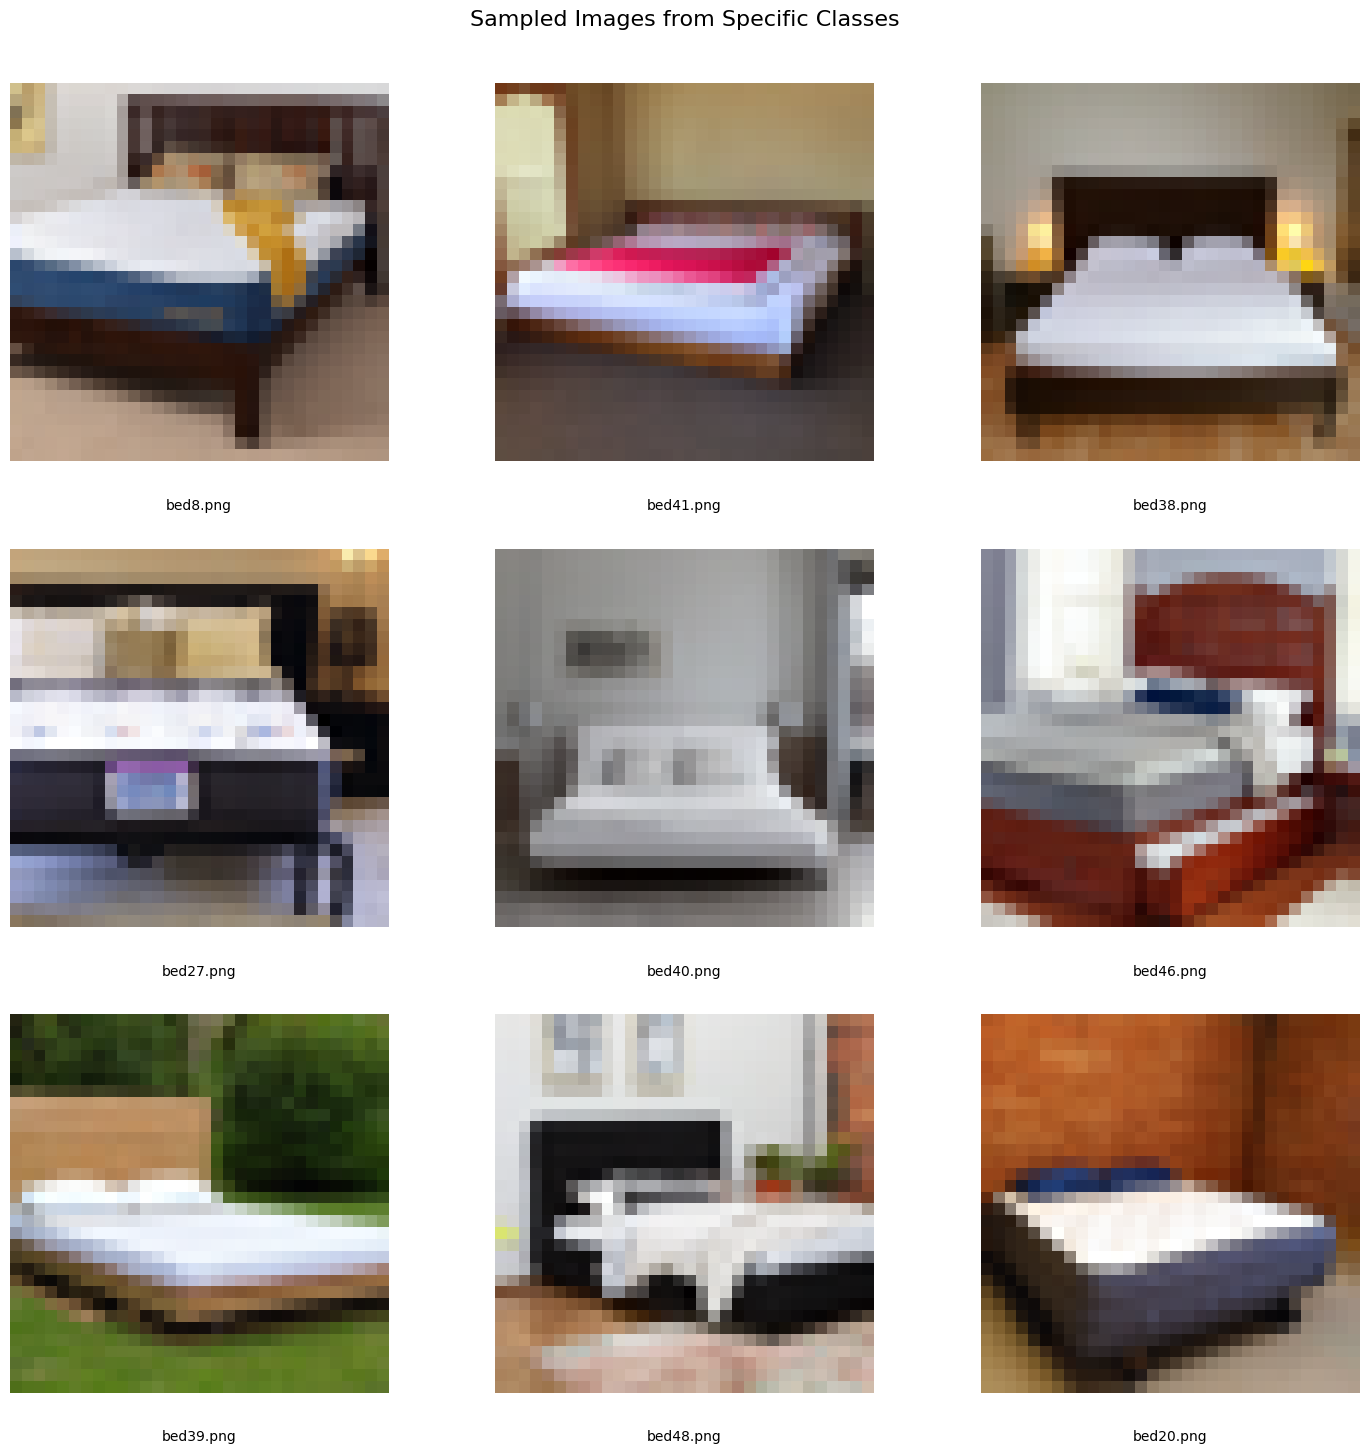

In [10]:
folder_path = 'saved_data/sd_scale8/cifar100_sd_v15_0314_scale_8_seed41'
classes = ['bed']  # Replace with actual class names
display_images_from_classes(folder_path, classes)

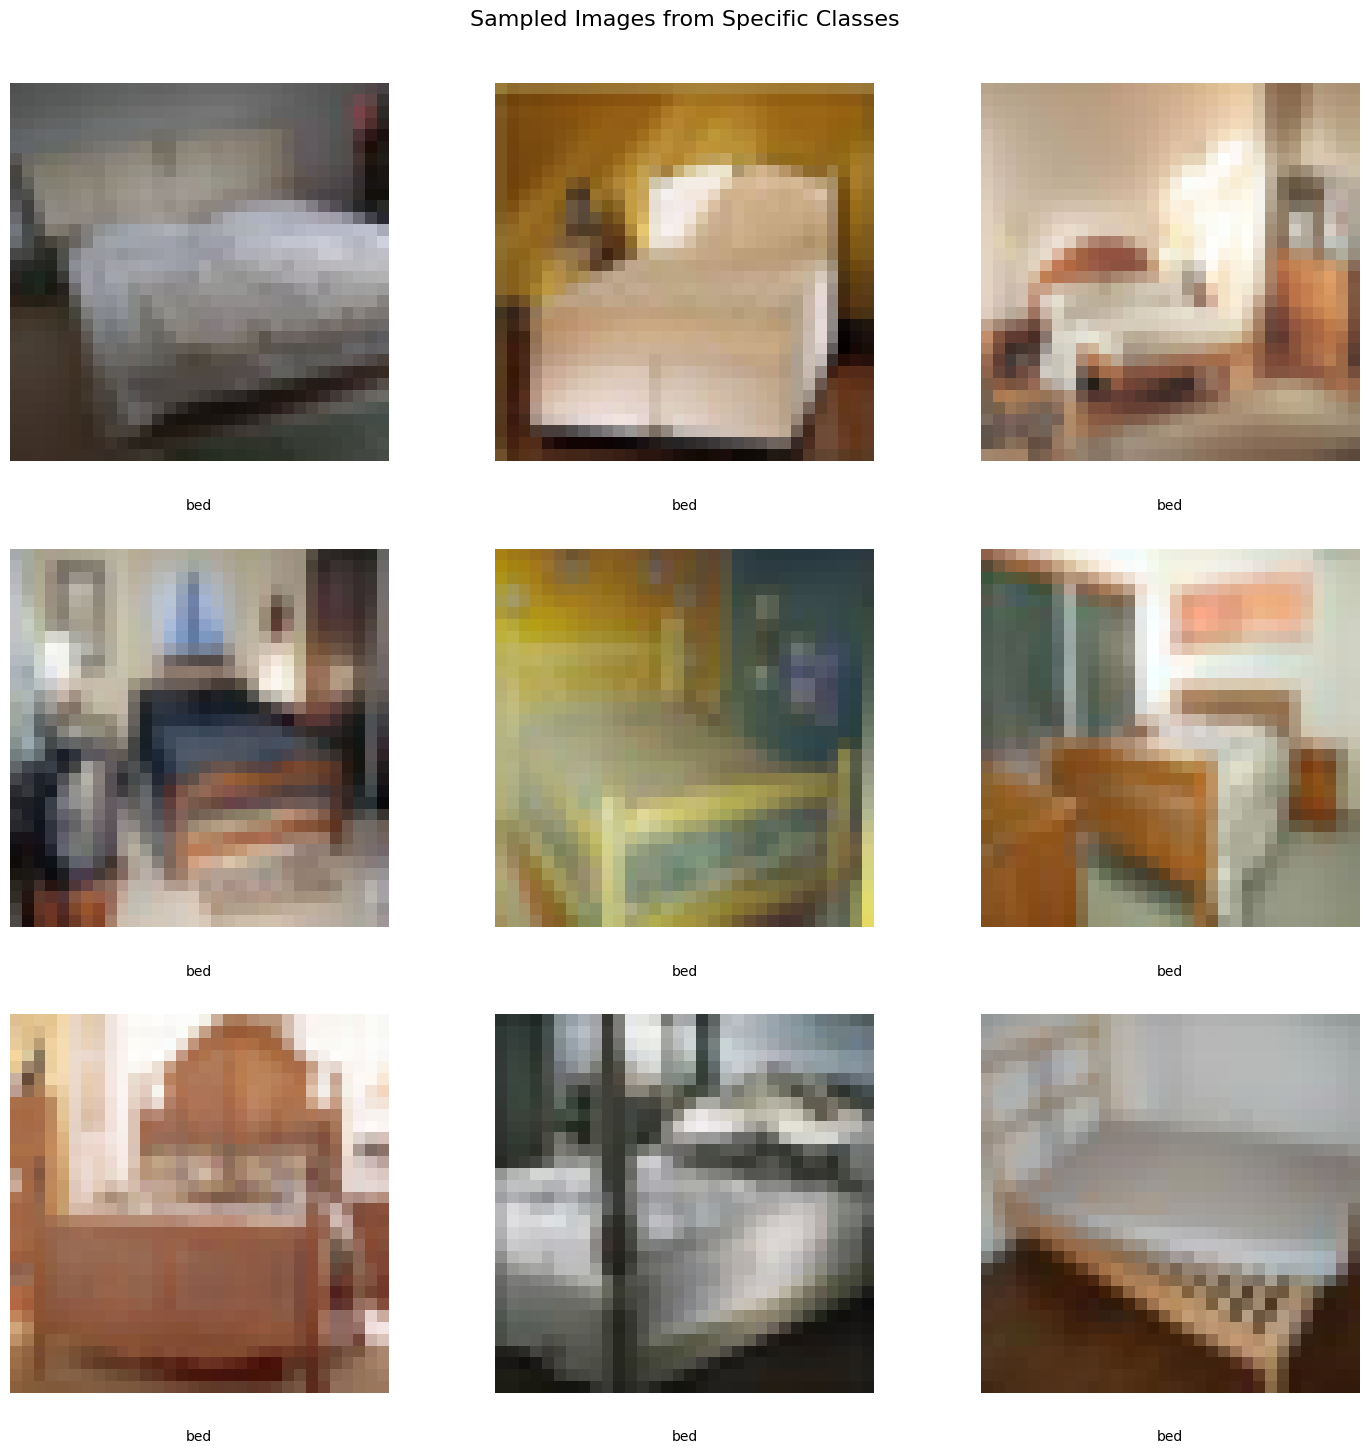

In [39]:
folder_path = 'saved_data/cifar0413_100'
classes = ['bed']  # Replace with actual class names
display_images_from_classes(folder_path, classes)

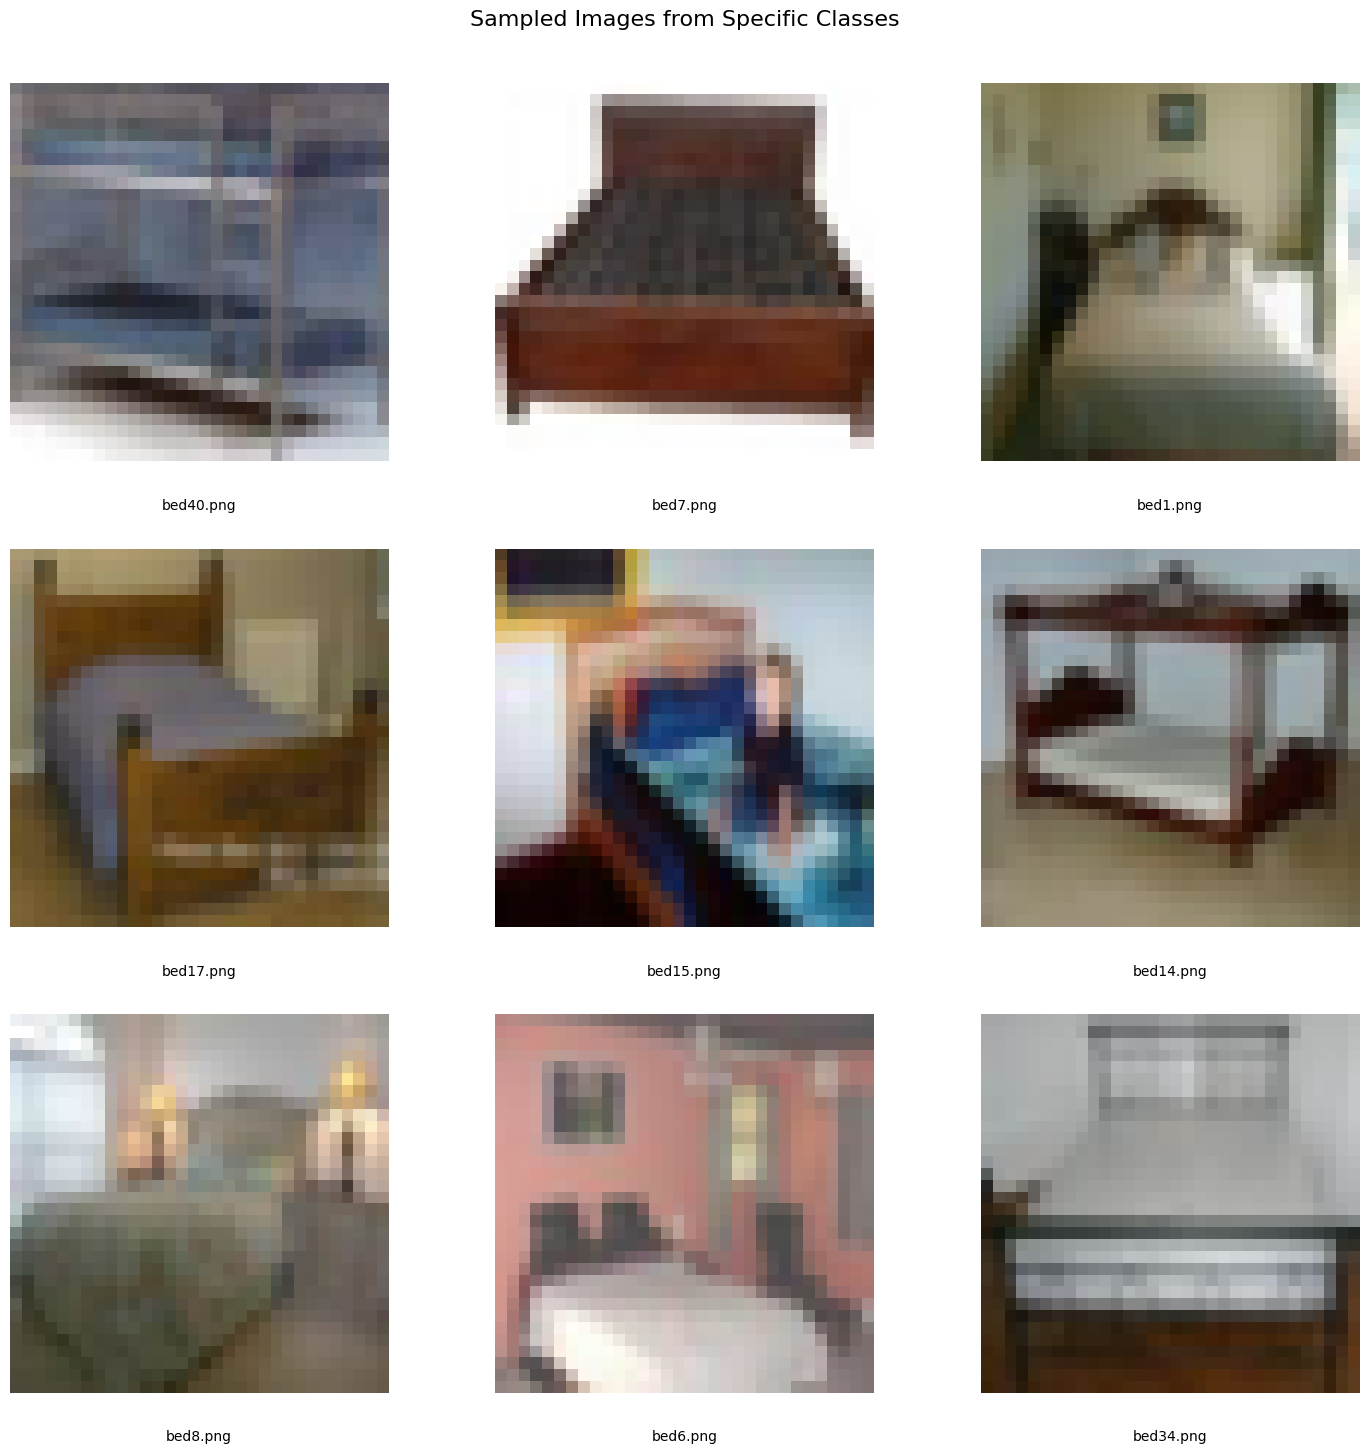

In [12]:
folder_path = 'saved_data/llava_saved_data_310/cifar_50'
classes = ['bed']  # Replace with actual class names
display_images_from_classes(folder_path, classes)

In [10]:
def display_images_from_classes(folder_path1, folder_path2, classes, num_images=9, grid_size=(3, 3)):
    """
    Display a grid of images sampled from specific classes in two folders, displayed side by side.

    Args:
    folder_path1 (str): Path to the first folder containing images.
    folder_path2 (str): Path to the second folder containing images.
    classes (list): List of class names to include in the sampling.
    num_images (int): Number of image pairs to sample and display.
    grid_size (tuple): Dimensions of the grid (rows, columns) for displaying image pairs.
    """
    # Ensure the folders exist and are directories
    if not os.path.isdir(folder_path1) or not os.path.isdir(folder_path2):
        print("One or both specified paths are not valid directories.")
        return

    # Function to get filtered files from a folder
    def get_filtered_files(folder_path):
        all_files = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]
        return [f for f in all_files if any(f.startswith(cls) for cls in classes) and f.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp'))]

    # Get filtered files from both folders
    filtered_files1 = get_filtered_files(folder_path1)
    filtered_files2 = get_filtered_files(folder_path2)

    # Set the seed for reproducibility
    random.seed(42)

    # Randomly select files from both lists ensuring the same indices are used
    if len(filtered_files1) < num_images or len(filtered_files2) < num_images:
        print(f"Not enough image files to sample from. Found only {len(filtered_files1)} files in folder1 and {len(filtered_files2)} in folder2.")
        return

    indices = random.sample(range(len(filtered_files1)), num_images)
    sampled_files1 = [filtered_files1[i] for i in indices]
    sampled_files2 = [filtered_files2[i] for i in indices if i < len(filtered_files2)]  # Ensure same length of indices for folder2

    # Plot images in pairs
    fig, axes = plt.subplots(nrows=grid_size[0], ncols=grid_size[1]*2, figsize=(15, 7.5))  # Adjust the figsize and multiply columns by 2
    fig.suptitle('Sampled Image Pairs from Specific Classes', fontsize=16)

    # Iterate over each pair and display
    ax_idx = 0  # Index to track axes for image placement
    for file1, file2 in zip(sampled_files1, sampled_files2):
        # Display the first image
        img1 = mpimg.imread(os.path.join(folder_path1, file1))
        axes.flat[ax_idx].imshow(img1)
        axes.flat[ax_idx].axis('off')  # Hide axes
        axes.flat[ax_idx].set_title(file1.split('_')[0], fontsize=10, y=-0.15)

        # Display the second image right next to the first
        img2 = mpimg.imread(os.path.join(folder_path2, file2))
        axes.flat[ax_idx + 1].imshow(img2)
        axes.flat[ax_idx + 1].axis('off')
        axes.flat[ax_idx + 1].set_title(file2.split('_')[0], fontsize=10, y=-0.15)
        
        ax_idx += 2  # Increment by 2 for the next pair

    plt.tight_layout(pad=3.0)
    plt.show()


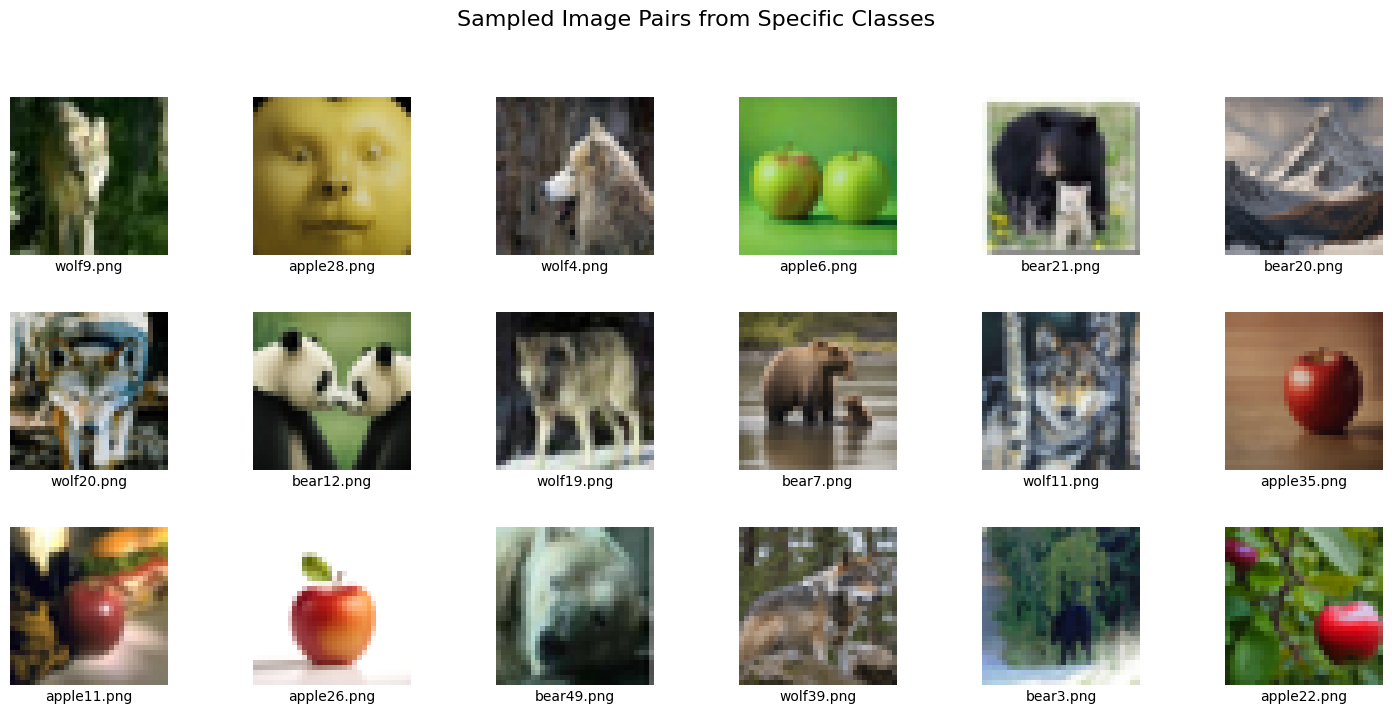

In [16]:
# Example usage
folder_path1 = 'saved_data/llava_saved_data_310/cifar_50'
folder_path2 = 'saved_data/sd_turbo_50_llavaprompt'
classes = ['wolf', 'apple', 'bear']  # Example class names
display_images_from_classes(folder_path1, folder_path2, classes)


In [35]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def display_matched_images(folder_path1, folder_path2, classes, num_images=9, grid_size=(3, 3)):
    """
    Display a grid of matched image pairs from two folders, where each pair consists of the same image from each folder.

    Args:
    folder_path1 (str): Path to the first folder containing images.
    folder_path2 (str): Path to the second folder containing images.
    classes (list): List of class names for which images are to be matched.
    num_images (int): Number of image pairs to sample and display.
    grid_size (tuple): Dimensions of the grid (rows, columns) for displaying image pairs.
    """
    # Check if the folders exist
    if not os.path.isdir(folder_path1) or not os.path.isdir(folder_path2):
        print("One or both specified paths are not valid directories.")
        return

    # Retrieve files matching the class names and file types
    def get_class_files(folder_path):
        files = os.listdir(folder_path)
        return [f for f in files if any(f.startswith(cls) for cls in classes) and f.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp'))]

    files1 = get_class_files(folder_path1)
    files2 = get_class_files(folder_path2)

    # Find common files in both directories
    common_files = set(files1).intersection(files2)
    if len(common_files) < num_images:
        print(f"Not enough matching files found to display. Only found {len(common_files)} matching files.")
        return

    # Select a random sample of matching files
#     random.seed(42)  # Seed for reproducibility
    sampled_files = random.sample(common_files, num_images)

    # Set up the plot for displaying images
    fig, axes = plt.subplots(nrows=grid_size[0], ncols=grid_size[1]*2, figsize=(15, 7.5))
#     fig.suptitle('Matched Image Pairs from Two Directories', fontsize=16)

    # Display images
    for idx, filename in enumerate(sampled_files):
        img_path1 = os.path.join(folder_path1, filename)
        img_path2 = os.path.join(folder_path2, filename)

        img1 = mpimg.imread(img_path1)
        img2 = mpimg.imread(img_path2)

        # Plot image from first folder
        ax1 = axes.flat[2*idx]
        ax1.imshow(img1)
        ax1.axis('off')
        ax1.set_title(f"CIFAR100: {filename}", fontsize=10)

        # Plot image from second folder
        ax2 = axes.flat[2*idx + 1]
        ax2.imshow(img2)
        ax2.axis('off')
        ax2.set_title(f"LLaVA+SD-turbo: {filename}", fontsize=10)

    plt.tight_layout()
    plt.show()


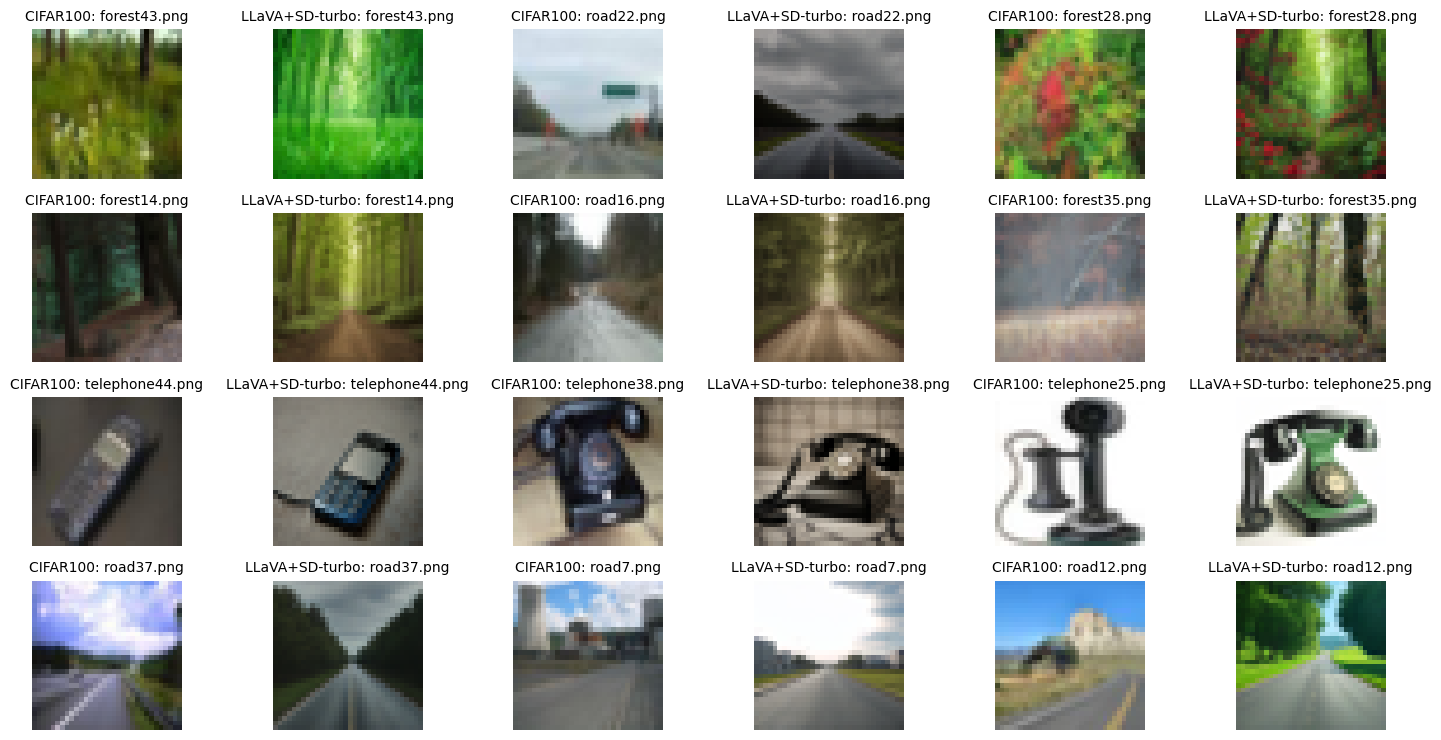

In [41]:
# Example usage
folder_path1 = 'saved_data/llava_saved_data_310/cifar_50'
folder_path2 = 'saved_data/sd_turbo_50_llavaprompt'
classes = ['forest', 'telephone','road']  # Example class names
display_matched_images(folder_path1, folder_path2, classes, num_images=12, grid_size=(4, 3))


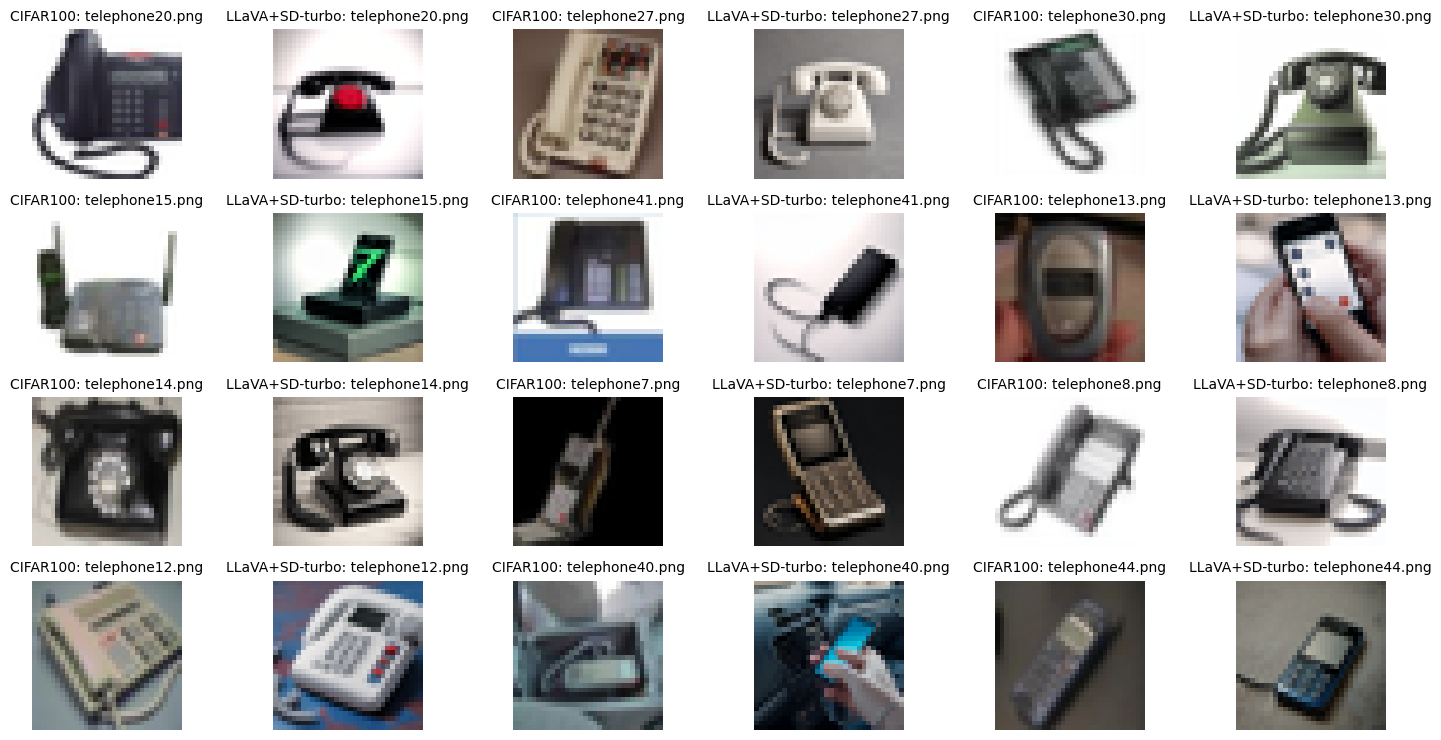

In [38]:
# Example usage
folder_path1 = 'saved_data/llava_saved_data_310/cifar_50'
folder_path2 = 'saved_data/sd_turbo_50_llavaprompt'
classes = ['telephone']  # Example class names
display_matched_images(folder_path1, folder_path2, classes, num_images=12, grid_size=(4, 3))


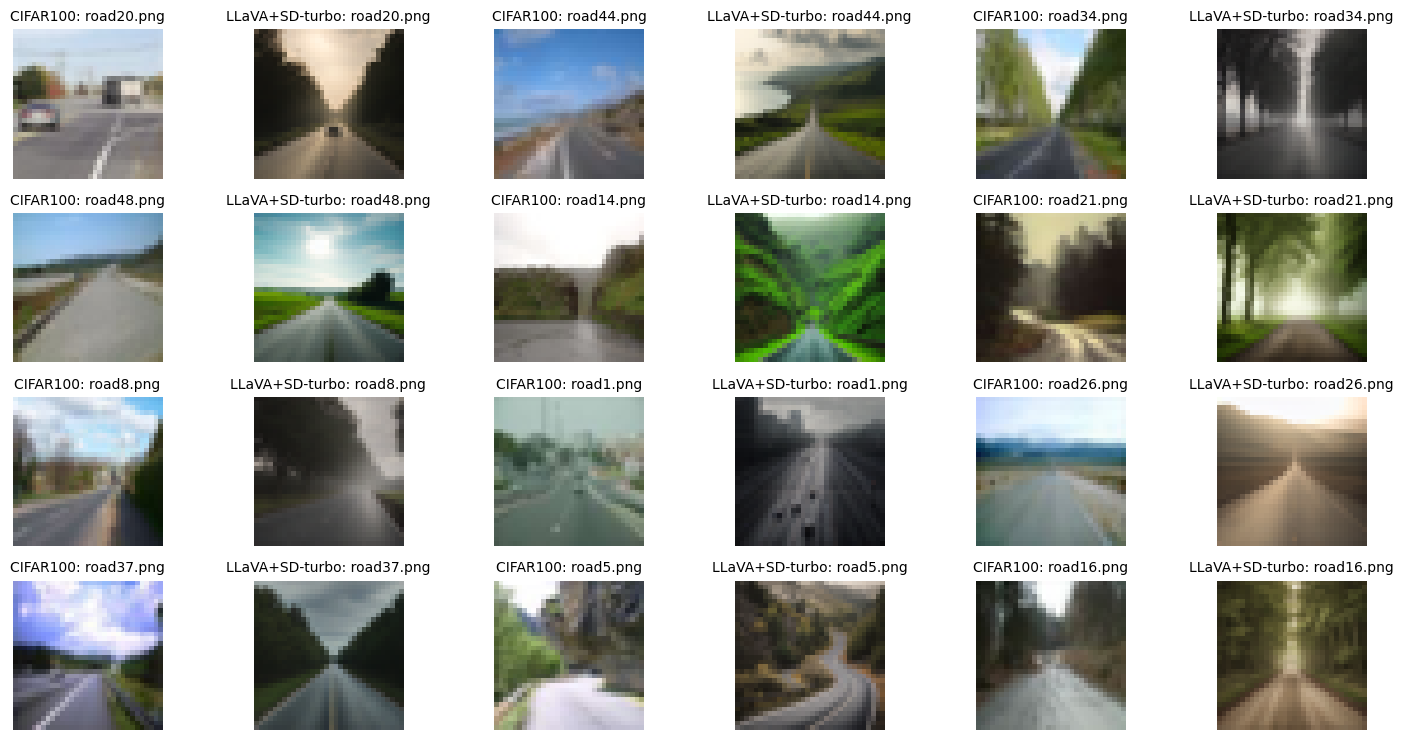

In [39]:
# Example usage
folder_path1 = 'saved_data/llava_saved_data_310/cifar_50'
folder_path2 = 'saved_data/sd_turbo_50_llavaprompt'
classes = ['road']  # Example class names
display_matched_images(folder_path1, folder_path2, classes, num_images=12, grid_size=(4, 3))


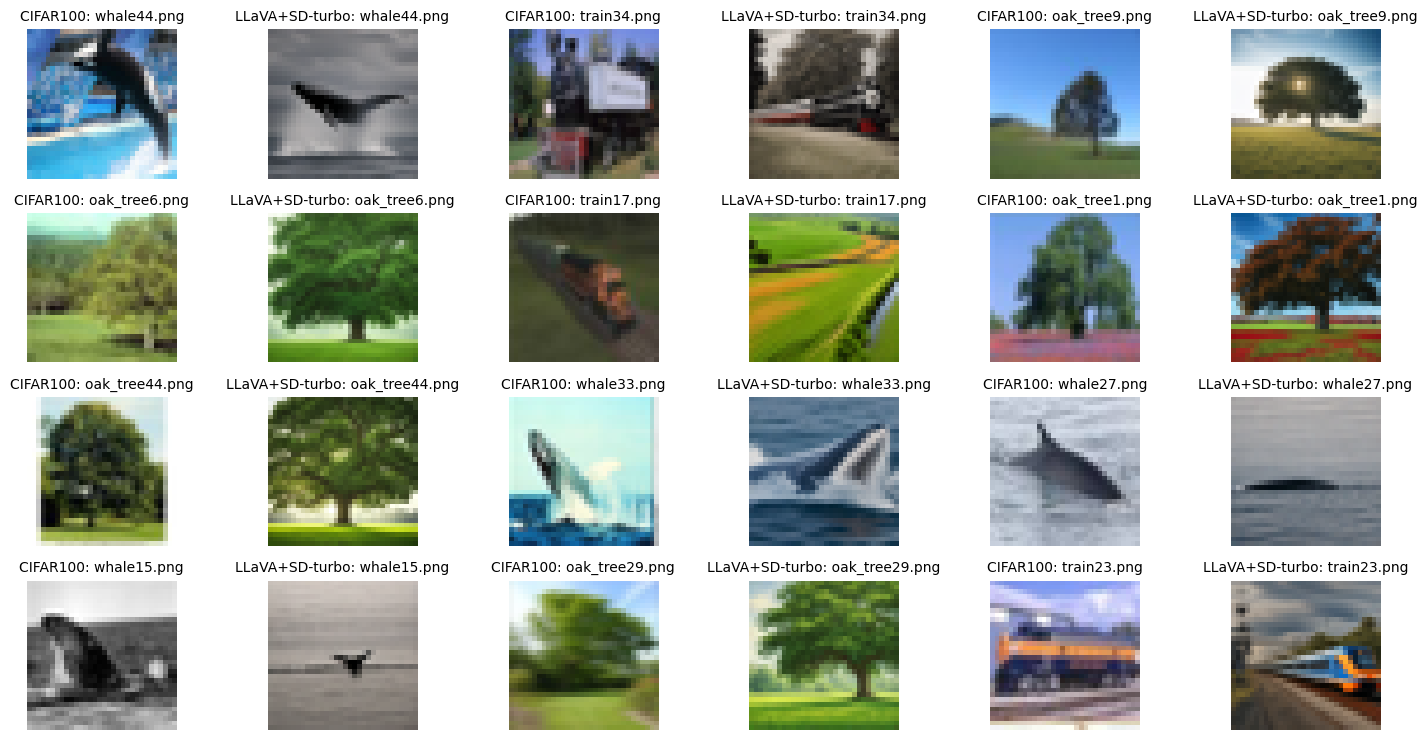

In [40]:
folder_path1 = 'saved_data/llava_saved_data_310/cifar_50'
folder_path2 = 'saved_data/sd_turbo_50_llavaprompt'
classes = ['train', 'whale', 'oak_tree']  # Example class names
display_matched_images(folder_path1, folder_path2, classes, num_images=12, grid_size=(4, 3))


In [ ]:
file_path = 'logs/log_real_sythesis_llavaprompt_class.txt'


In [15]:
import os

def extract_class_accuracy_from_file(file_path, last_n_lines=None):
    """
    Extracts class numbers and their corresponding accuracies from the last few lines of a text file.
    
    Args:
    file_path (str): Path to the text file.
    last_n_lines (int): Number of lines from the end of the file to read. If None, reads the entire file.
    
    Returns:
    dict: A dictionary with class numbers as keys and accuracies as values.
    """
    class_accuracy_dict = {}
    try:
        with open(file_path, 'r') as file:
            if last_n_lines is not None:
                # Seek to the end of the file and read last_n_lines
                lines = file.readlines()[-last_n_lines:]
            else:
                # Read all lines in the file
                lines = file.readlines()

            for line in lines:
                # Process each line as before
                parts = line.split(' = ')
                if len(parts) == 2:
                    class_number = parts[0].split('/')[-1]
                    accuracy = float(parts[1])
                    class_accuracy_dict[int(class_number)] = accuracy
    except Exception as e:
        print(f"Error reading from file: {e}")
    
    return class_accuracy_dict



In [6]:
# Example usage
file_path = 'logs/log_real_sythesis_mixup.txt'
accuracy_dict = extract_class_accuracy_from_file(file_path, last_n_lines=100)  # Adjust last_n_lines as needed
print(accuracy_dict)

{0: 0.82, 1: 0.04, 10: 0.3, 11: 0.15, 12: 0.55, 13: 0.44, 14: 0.55, 15: 0.45, 16: 0.52, 17: 0.28, 18: 0.1, 19: 0.05, 2: 0.31, 20: 0.15, 21: 0.21, 22: 0.31, 23: 0.73, 24: 0.64, 25: 0.04, 26: 0.41, 27: 0.4, 28: 0.11, 29: 0.43, 3: 0.09, 30: 0.52, 31: 0.2, 32: 0.06, 33: 0.24, 34: 0.46, 35: 0.33, 36: 0.51, 37: 0.18, 38: 0.24, 39: 0.54, 4: 0.07, 40: 0.12, 41: 0.13, 42: 0.56, 43: 0.47, 44: 0.23, 45: 0.17, 46: 0.13, 47: 0.67, 48: 0.77, 49: 0.13, 5: 0.01, 50: 0.24, 51: 0.47, 52: 0.05, 53: 0.22, 54: 0.61, 55: 0.09, 56: 0.34, 57: 0.61, 58: 0.14, 59: 0.38, 6: 0.59, 60: 0.75, 61: 0.57, 62: 0.12, 63: 0.46, 64: 0.05, 65: 0.08, 66: 0.08, 67: 0.51, 68: 0.4, 69: 0.62, 7: 0.45, 70: 0.48, 71: 0.6, 72: 0.14, 73: 0.45, 74: 0.05, 75: 0.85, 76: 0.74, 77: 0.06, 78: 0.05, 79: 0.07, 8: 0.26, 80: 0.23, 81: 0.32, 82: 0.47, 83: 0.05, 84: 0.35, 85: 0.16, 86: 0.11, 87: 0.61, 88: 0.41, 89: 0.56, 9: 0.6, 90: 0.06, 91: 0.65, 92: 0.48, 93: 0.15, 94: 0.82, 95: 0.08, 96: 0.53, 97: 0.44, 98: 0.28, 99: 0.05}


In [7]:
sum(accuracy_dict.values())/100

0.33809999999999996

In [11]:

order_list = [[36, 0, 54, 5, 20],
 [22, 45, 13, 83, 19],
 [26, 73, 16, 62, 33],
 [34, 98, 24, 74, 53],
 [10, 94, 51, 4, 32],
 [38, 81, 50, 40, 41],
 [30, 89, 69, 64, 21],
 [84, 14, 88, 49, 68],
 [6, 80, 57, 65, 46],
 [9, 91, 48, 72, 31],
 [76, 7, 47, 8, 1],
 [61, 75, 63, 18, 86],
 [59, 70, 43, 85, 95],
 [27, 93, 35, 25, 82],
 [44, 56, 67, 66, 37],
 [60, 11, 2, 78, 52],
 [97, 39, 55, 3, 99],
 [29, 71, 23, 28, 90],
 [87, 15, 92, 17, 77],
 [12, 42, 96, 79, 58]]
syn_classes = [order[3:] for order in order_list]
syn_classes = [item for lists in syn_classes for item in lists]
syn_classes

[5,
 20,
 83,
 19,
 62,
 33,
 74,
 53,
 4,
 32,
 40,
 41,
 64,
 21,
 49,
 68,
 65,
 46,
 72,
 31,
 8,
 1,
 18,
 86,
 85,
 95,
 25,
 82,
 66,
 37,
 78,
 52,
 3,
 99,
 28,
 90,
 17,
 77,
 79,
 58]

In [16]:
def filter_class_dict(full_dict, class_list):
    """
    Filters a dictionary to include only specific keys (class numbers) present in a given list.

    Args:
    full_dict (dict): The original dictionary containing class numbers as keys and associated values.
    class_list (list): A list of class numbers to retain in the new dictionary.

    Returns:
    dict: A filtered dictionary containing only the keys and values for class numbers in the class_list.
    """
    # Use dictionary comprehension to filter the dictionary
    filtered_dict = {class_number: full_dict[class_number] for class_number in class_list if class_number in full_dict}
    return filtered_dict


In [13]:
# Example usage
full_dict = accuracy_dict
class_list = syn_classes  # List of class numbers you want to retain

filtered_dict1 = filter_class_dict(full_dict, class_list)
print(filtered_dict1)


NameError: name 'accuracy_dict' is not defined

In [39]:
sum(filtered_dict1.values())/len(filtered_dict1.values())

0.12724999999999997

In [40]:
full_list = [i for i in range(100)]
filtered_dict2 = filter_class_dict(full_dict, list(set(full_list)-set(class_list)))
print(filtered_dict2)

{0: 0.82, 2: 0.31, 6: 0.59, 7: 0.45, 9: 0.6, 10: 0.3, 11: 0.15, 12: 0.55, 13: 0.44, 14: 0.55, 15: 0.45, 16: 0.52, 22: 0.31, 23: 0.73, 24: 0.64, 26: 0.41, 27: 0.4, 29: 0.43, 30: 0.52, 34: 0.46, 35: 0.33, 36: 0.51, 38: 0.24, 39: 0.54, 42: 0.56, 43: 0.47, 44: 0.23, 45: 0.17, 47: 0.67, 48: 0.77, 50: 0.24, 51: 0.47, 54: 0.61, 55: 0.09, 56: 0.34, 57: 0.61, 59: 0.38, 60: 0.75, 61: 0.57, 63: 0.46, 67: 0.51, 69: 0.62, 70: 0.48, 71: 0.6, 73: 0.45, 75: 0.85, 76: 0.74, 80: 0.23, 81: 0.32, 84: 0.35, 87: 0.61, 88: 0.41, 89: 0.56, 91: 0.65, 92: 0.48, 93: 0.15, 94: 0.82, 96: 0.53, 97: 0.44, 98: 0.28}


In [41]:
sum(filtered_dict2.values())/len(filtered_dict2)

0.47866666666666674

In [17]:
# Example usage
file_path = 'logs/log_real_sythesis_llavaprompt_class_3real_i2i.txt'
accuracy_dict = extract_class_accuracy_from_file(file_path, last_n_lines=100)  # Adjust last_n_lines as needed
print(accuracy_dict)


{0: 0.91, 1: 0.11, 10: 0.57, 11: 0.37, 12: 0.95, 13: 0.62, 14: 0.61, 15: 0.62, 16: 0.6, 17: 0.05, 18: 0.09, 19: 0.02, 2: 0.41, 20: 0.41, 21: 0.19, 22: 0.63, 23: 0.68, 24: 0.76, 25: 0.0, 26: 0.6, 27: 0.39, 28: 0.21, 29: 0.55, 3: 0.01, 30: 0.62, 31: 0.04, 32: 0.1, 33: 0.01, 34: 0.59, 35: 0.38, 36: 0.76, 37: 0.03, 38: 0.43, 39: 0.74, 4: 0.0, 40: 0.12, 41: 0.27, 42: 0.94, 43: 0.48, 44: 0.29, 45: 0.51, 46: 0.01, 47: 0.45, 48: 0.93, 49: 0.03, 5: 0.09, 50: 0.39, 51: 0.52, 52: 0.0, 53: 0.19, 54: 0.72, 55: 0.28, 56: 0.67, 57: 0.73, 58: 0.05, 59: 0.49, 6: 0.66, 60: 0.7, 61: 0.68, 62: 0.02, 63: 0.5, 64: 0.01, 65: 0.02, 66: 0.03, 67: 0.49, 68: 0.11, 69: 0.74, 7: 0.55, 70: 0.69, 71: 0.75, 72: 0.0, 73: 0.48, 74: 0.0, 75: 0.89, 76: 0.72, 77: 0.03, 78: 0.08, 79: 0.17, 8: 0.1, 80: 0.3, 81: 0.65, 82: 0.22, 83: 0.11, 84: 0.6, 85: 0.01, 86: 0.21, 87: 0.82, 88: 0.49, 89: 0.69, 9: 0.8, 90: 0.0, 91: 0.74, 92: 0.58, 93: 0.32, 94: 0.87, 95: 0.01, 96: 0.93, 97: 0.47, 98: 0.44, 99: 0.22}


In [18]:
filtered_dict1 = filter_class_dict(accuracy_dict, syn_classes)
print(filtered_dict1)


{5: 0.09, 20: 0.41, 83: 0.11, 19: 0.02, 62: 0.02, 33: 0.01, 74: 0.0, 53: 0.19, 4: 0.0, 32: 0.1, 40: 0.12, 41: 0.27, 64: 0.01, 21: 0.19, 49: 0.03, 68: 0.11, 65: 0.02, 46: 0.01, 72: 0.0, 31: 0.04, 8: 0.1, 1: 0.11, 18: 0.09, 86: 0.21, 85: 0.01, 95: 0.01, 25: 0.0, 82: 0.22, 66: 0.03, 37: 0.03, 78: 0.08, 52: 0.0, 3: 0.01, 99: 0.22, 28: 0.21, 90: 0.0, 17: 0.05, 77: 0.03, 79: 0.17, 58: 0.05}


In [19]:
sum(filtered_dict1.values())/len(filtered_dict1.values())

0.08449999999999998

In [20]:
full_list = [i for i in range(100)]
filtered_dict2 = filter_class_dict(accuracy_dict, list(set(full_list)-set(syn_classes)))
print(filtered_dict2)

{0: 0.91, 2: 0.41, 6: 0.66, 7: 0.55, 9: 0.8, 10: 0.57, 11: 0.37, 12: 0.95, 13: 0.62, 14: 0.61, 15: 0.62, 16: 0.6, 22: 0.63, 23: 0.68, 24: 0.76, 26: 0.6, 27: 0.39, 29: 0.55, 30: 0.62, 34: 0.59, 35: 0.38, 36: 0.76, 38: 0.43, 39: 0.74, 42: 0.94, 43: 0.48, 44: 0.29, 45: 0.51, 47: 0.45, 48: 0.93, 50: 0.39, 51: 0.52, 54: 0.72, 55: 0.28, 56: 0.67, 57: 0.73, 59: 0.49, 60: 0.7, 61: 0.68, 63: 0.5, 67: 0.49, 69: 0.74, 70: 0.69, 71: 0.75, 73: 0.48, 75: 0.89, 76: 0.72, 80: 0.3, 81: 0.65, 84: 0.6, 87: 0.82, 88: 0.49, 89: 0.69, 91: 0.74, 92: 0.58, 93: 0.32, 94: 0.87, 96: 0.93, 97: 0.47, 98: 0.44}


In [21]:
sum(filtered_dict2.values())/len(filtered_dict2.values())

0.6123333333333332

In [51]:
syn_class = [20, 19, 33, 53, 32, 41, 21, 68, 46, 31, 1, 86, 95, 82, 37, 52, 99, 90, 77, 58]


In [52]:
file_path = 'logs/log_real_sythesis_llavaprompt_class_4real.txt'
accuracy_dict = extract_class_accuracy_from_file(file_path, last_n_lines=100)  # Adjust last_n_lines as needed
print(accuracy_dict)

{0: 0.88, 1: 0.0, 10: 0.33, 11: 0.39, 12: 0.94, 13: 0.52, 14: 0.54, 15: 0.56, 16: 0.67, 17: 0.78, 18: 0.49, 19: 0.07, 2: 0.51, 20: 0.09, 21: 0.09, 22: 0.58, 23: 0.77, 24: 0.68, 25: 0.55, 26: 0.49, 27: 0.39, 28: 0.76, 29: 0.57, 3: 0.45, 30: 0.55, 31: 0.15, 32: 0.01, 33: 0.17, 34: 0.62, 35: 0.39, 36: 0.77, 37: 0.05, 38: 0.51, 39: 0.71, 4: 0.5, 40: 0.5, 41: 0.08, 42: 0.9, 43: 0.57, 44: 0.34, 45: 0.45, 46: 0.07, 47: 0.43, 48: 0.9, 49: 0.72, 5: 0.63, 50: 0.37, 51: 0.6, 52: 0.01, 53: 0.2, 54: 0.71, 55: 0.24, 56: 0.65, 57: 0.73, 58: 0.2, 59: 0.43, 6: 0.62, 60: 0.77, 61: 0.66, 62: 0.65, 63: 0.6, 64: 0.4, 65: 0.41, 66: 0.56, 67: 0.51, 68: 0.36, 69: 0.69, 7: 0.48, 70: 0.57, 71: 0.68, 72: 0.34, 73: 0.51, 74: 0.45, 75: 0.79, 76: 0.76, 77: 0.02, 78: 0.52, 79: 0.91, 8: 0.79, 80: 0.44, 81: 0.7, 82: 0.46, 83: 0.63, 84: 0.59, 85: 0.79, 86: 0.16, 87: 0.79, 88: 0.48, 89: 0.73, 9: 0.79, 90: 0.06, 91: 0.75, 92: 0.56, 93: 0.43, 94: 0.92, 95: 0.04, 96: 0.92, 97: 0.62, 98: 0.47, 99: 0.15}


In [59]:
filtered_dict1 = filter_class_dict(accuracy_dict, syn_class)
print((filtered_dict1))

{20: 0.09, 19: 0.07, 33: 0.17, 53: 0.2, 32: 0.01, 41: 0.08, 21: 0.09, 68: 0.36, 46: 0.07, 31: 0.15, 1: 0.0, 86: 0.16, 95: 0.04, 82: 0.46, 37: 0.05, 52: 0.01, 99: 0.15, 90: 0.06, 77: 0.02, 58: 0.2}


In [60]:
sum(filtered_dict1.values())/20

0.122

In [62]:
full_list = [i for i in range(100)]
filtered_dict2 = filter_class_dict(accuracy_dict, list(set(full_list)-set(syn_class)))
print(filtered_dict2)

{0: 0.88, 2: 0.51, 3: 0.45, 4: 0.5, 5: 0.63, 6: 0.62, 7: 0.48, 8: 0.79, 9: 0.79, 10: 0.33, 11: 0.39, 12: 0.94, 13: 0.52, 14: 0.54, 15: 0.56, 16: 0.67, 17: 0.78, 18: 0.49, 22: 0.58, 23: 0.77, 24: 0.68, 25: 0.55, 26: 0.49, 27: 0.39, 28: 0.76, 29: 0.57, 30: 0.55, 34: 0.62, 35: 0.39, 36: 0.77, 38: 0.51, 39: 0.71, 40: 0.5, 42: 0.9, 43: 0.57, 44: 0.34, 45: 0.45, 47: 0.43, 48: 0.9, 49: 0.72, 50: 0.37, 51: 0.6, 54: 0.71, 55: 0.24, 56: 0.65, 57: 0.73, 59: 0.43, 60: 0.77, 61: 0.66, 62: 0.65, 63: 0.6, 64: 0.4, 65: 0.41, 66: 0.56, 67: 0.51, 69: 0.69, 70: 0.57, 71: 0.68, 72: 0.34, 73: 0.51, 74: 0.45, 75: 0.79, 76: 0.76, 78: 0.52, 79: 0.91, 80: 0.44, 81: 0.7, 83: 0.63, 84: 0.59, 85: 0.79, 87: 0.79, 88: 0.48, 89: 0.73, 91: 0.75, 92: 0.56, 93: 0.43, 94: 0.92, 96: 0.92, 97: 0.62, 98: 0.47}


In [63]:
sum(filtered_dict2.values())/80

0.6043749999999999

In [65]:
sum(accuracy_dict.values())/100

0.5078999999999999